
# 4.10 : Coding Etiquette & Excel Reporting

###### TABLE OF CONTENTS

###### 1.1 Importing the libraries and dataset


###### 1.2 Security Implications

###### 1.3.1 Regional segmentation of the data.
###### 1.3.2 Check spending habits between different regions

###### 1.4 Exclusion flag for low-activity customer(customers with less than 5 orders)

###### 1.5 Marketing and business strategy

###### 1.6 Distribution of profiles

###### 1.7 Min, max and mean aggregations of customer profiles

###### 1.8 Regional and departmental links

###### 1.9.1 Busiest order days/times
###### 1.9.2 Highest spend times/product types
###### 1.9.3 Product range price groupings
###### 1.9.4 Most popular departments
###### 1.9.5 Brand loyalty groups
###### 1.9.6 Loyalty group ordering habits
###### 1.9.7 Regional ordering habits
###### 1.9.8 Age / Family status ordering habits
###### 1.9.9 Demographic information
###### 1.9.10 Customer profile ordering habits

### 1.1 - Import the libraries and dataset

In [1]:
# 01 - Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# 02 - Import the data

df = pd.read_pickle(os.path.join(r"/content/drive/MyDrive/AB Instacart Project Folder/2. Data/df_merged_4_9.pkl"))

### 1.2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis

In [3]:
# Display max rows and columns

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# Check the data

df.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_order,spender_flag,median_order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,-5,5,1,9,30.0,0,-60,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,-124,7,5,15,11.0,0,-60,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,-104,8,1,15,10.0,0,-60,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,123,2,2,9,14.0,0,16,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,-35,3,3,11,30.0,0,16,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer


##### Each customer has a unique user_id so the names are not necessary and should be removed to eliminate any security implications.

In [5]:
# Delete name columns from df

order_products_all = df.drop(columns = ['first_name','surname'])

### 1.3.1 - Create a regional segmentation of the data.

In [6]:
# Create a new column 'Region' and assign 'South' to relevant states

order_products_all.loc[order_products_all['state'].str.contains('Delaware|Maryland|District of Columbia|Virginia|West Virginia|North Carolina|South Carolina|Georgia|Florida|Kentucky|Tennessee|Mississippi|Alabama|Oklahoma|Texas|Arkansas|Louisiana'), 'Region'] = 'South'

In [7]:
# Create a new column 'Region' and assign 'West' to relevant states

order_products_all.loc[order_products_all['state'].str.contains('Idaho|Montana|Wyoming|Nevada|Utah|Colorado|Arizona|New Mexico|Alaska|Washington|Oregon|California|Hawaii'), 'Region'] = 'West'

In [8]:
# Create a new column 'Region' and assign 'Midwest' to relevant states

order_products_all.loc[order_products_all['state'].str.contains('Wisconsin|Michigan|Illinois|Indiana|Ohio|North Dakota|South Dakota|Nebraska|Kansas|Minnesota|Iowa|Missouri'), 'Region'] = 'Midwest'

In [9]:
# Create a new column 'Region' and assign 'Northeast' to relevant states

order_products_all.loc[order_products_all['state'].str.contains('Maine|New Hampshire|Vermont|Massachusetts|Rhode Island|Connecticut|New York|Pennsylvania|New Jersey'), 'Region'] = 'Northeast'

In [10]:
# Check column created correctly by looking at frequency of each region

order_products_all['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

### 1.3.2 - Check spending habits between different regions

In [11]:
# Creating a table including spender_flag and Region for all customers

crosstab = pd.crosstab(order_products_all['Region'], order_products_all['spender_flag'], dropna = False)

In [12]:
# Check output

crosstab

spender_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


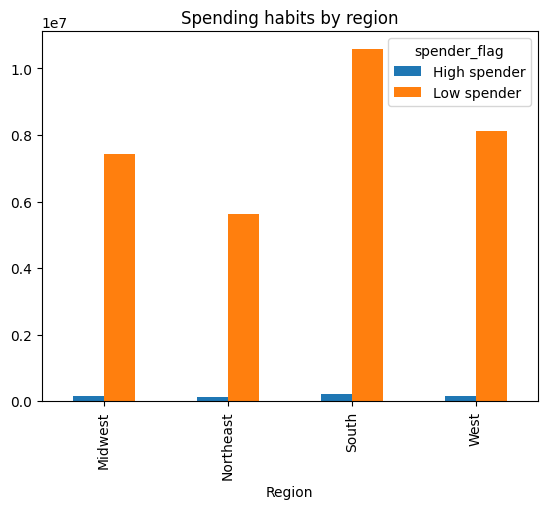

In [13]:
# Create bar chart showing spending habits in each region

spender_info = order_products_all.groupby(['Region', 'spender_flag']).size().unstack(fill_value = 0)
spender_bar = spender_info.plot.bar(title = 'Spending habits by region')

plt.show()

Midwest : low - 97.9%, high 2.1%

Northeast : low - 98.1%, high 1.9%

South : low - 98%, high - 2%

West : low - 98%, high - 2%

###### The spending habits of each region are very close. The highest percentage of low spenders are in the Northeast at 98.1%. The lowest percentage of low spenders are in the Midwest at 97.9%

### 1.4 - Create an exclusion flag for low-activity customer(customers with less than 5 orders)

In [14]:
# Create activity flag for customers with less than 5 orders

order_products_all.loc[order_products_all['max_order'] < 5, 'activity_flag'] = 'Low activity customer'

In [15]:
# Create activity flag for customer with 5 or more orders

order_products_all.loc[order_products_all['max_order'] >= 5, 'activity_flag'] = 'High activity customer'

In [16]:
# Create subset of data for low activity customers

df_unwanted = order_products_all[order_products_all['activity_flag'] == 'Low activity customer']

In [17]:
# Export data for unwanted customers

df_unwanted.to_pickle(os.path.join(r'/content/drive/MyDrive/AB Instacart Project Folder/2. Data'/'unwanted_customers.pkl'))

TypeError: ignored

### 1.5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

AGE

In [18]:
# Checking descriptive statistics for age column

order_products_all['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [19]:
# Create profile for age column

order_products_all.loc[order_products_all['age'] > 33 & (order_products_all['age'] < 65), 'age_group'] = 'Middle-aged Adult'

In [20]:
order_products_all.loc[order_products_all['age'] >= 65, 'age_group'] = 'Senior adult'

In [21]:
order_products_all.loc[order_products_all['age'] <= 33, 'age_group'] = 'Young adult'

In [22]:
# Check frequencies for each age group

order_products_all['age_group'].value_counts(dropna = False)

Middle-aged Adult    15709463
Senior adult          8575084
Young adult           8120312
Name: age_group, dtype: int64

INCOME

In [23]:
# Create profile for income column

order_products_all.loc[order_products_all['income'] >= 50000 & (order_products_all['income'] < 125000), 'income_group'] = 'Average income'

In [24]:
order_products_all.loc[order_products_all['income'] >= 125000, 'income_group'] = 'High income'

In [25]:
order_products_all.loc[order_products_all['income'] < 50000, 'income_group'] = 'Low income'

In [26]:
# Check frequencies for income_group

order_products_all['income_group'].value_counts(dropna = False)

Average income    20179819
High income        8630957
Low income         3594083
Name: income_group, dtype: int64

NUMBER OF DEPENDANTS

In [27]:
# Create list to determine if customer has dependants

result = []
for value in order_products_all['number_of_dependants']:
  if value == 0:
    result.append('No dependants')
  else:
    result.append('Has dependants')

In [28]:
# Create new column in df for dependants list

order_products_all['Dependants'] = result

In [29]:
# Check new column frequencies

order_products_all['Dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: Dependants, dtype: int64

CUSTOMER PROFILE

In [30]:
# Create customer profile column

order_products_all.loc[(order_products_all['Dependants'] == 'Has dependants') & (order_products_all['income_group'] == 'High income'), 'customer_profile'] = 'High income parent'

In [31]:
order_products_all.loc[(order_products_all['Dependants'] == 'Has dependants') & (order_products_all['income_group'] == 'Average income'), 'customer_profile'] = 'Average income parent'

In [32]:
order_products_all.loc[(order_products_all['Dependants'] == 'Has dependants') & (order_products_all['income_group'] == 'Low income'), 'customer_profile'] = 'Low income parent'

In [33]:
order_products_all.loc[(order_products_all['Dependants'] == 'No dependants') & (order_products_all['income_group'] == 'High income'), 'customer_profile'] = 'High income non-parent'

In [34]:
order_products_all.loc[(order_products_all['Dependants'] == 'No dependants') & (order_products_all['income_group'] == 'Average income'), 'customer_profile'] = 'Average income non-parent'

In [35]:
order_products_all.loc[(order_products_all['Dependants'] == 'No dependants') & (order_products_all['income_group'] == 'Low income'), 'customer_profile'] = 'Low income non-parent'

In [36]:
# Check frequencies for customer profiles

order_products_all['customer_profile'].value_counts(dropna = False)

Average income parent        15170355
High income parent            6446872
Average income non-parent     5009464
Low income parent             2690129
High income non-parent        2184085
Low income non-parent          903954
Name: customer_profile, dtype: int64

### 1.6 Create an appropriate visualization to show the distribution of profiles

<Axes: title={'center': 'Customer Profile Sales'}>

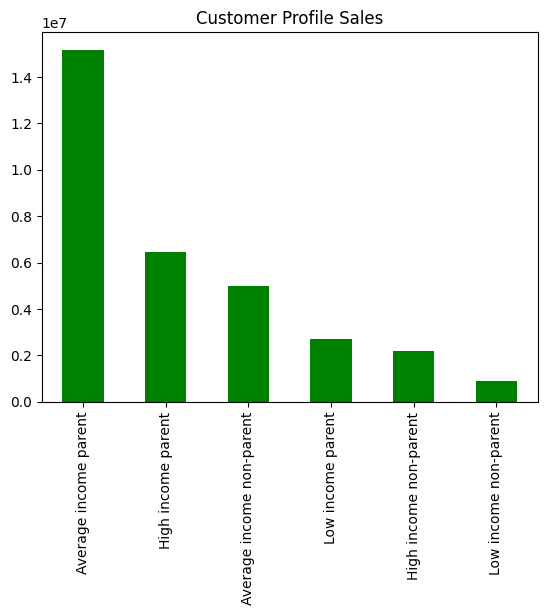

In [37]:
# Create a bar chart to show distribution of profiles

order_products_all['customer_profile'].value_counts().plot.bar(color = 'green', title = 'Customer Profile Sales')

In [38]:
# Check frequencies of income groups

order_products_all['income_group'].value_counts()

Average income    20179819
High income        8630957
Low income         3594083
Name: income_group, dtype: int64

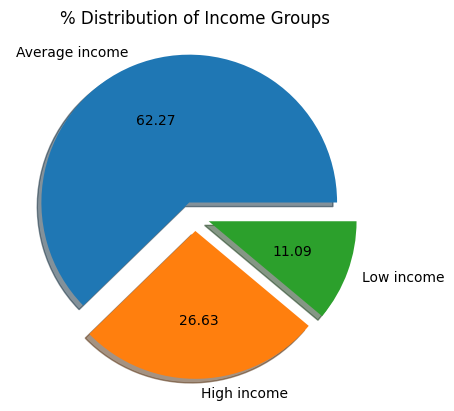

In [39]:
# create pie chart to show percentage of different income groups

y = np.array([20179819, 8630957, 3594083])
mylabels = ["Average income", "High income", "Low income"]
myexplode = [0.1, 0.1, 0.1]

incomepie = plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True,)
plt.title('% Distribution of Income Groups')
plt.show()

In [40]:
# Check frequencies of age groups

order_products_all['age_group'].value_counts()

Middle-aged Adult    15709463
Senior adult          8575084
Young adult           8120312
Name: age_group, dtype: int64

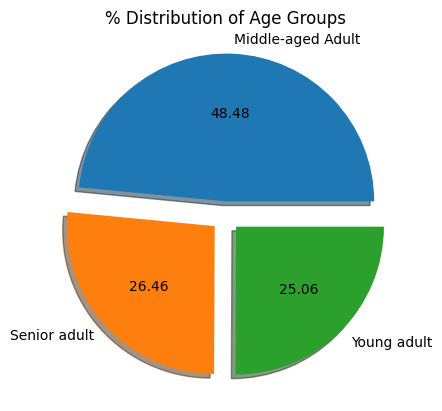

In [41]:
# create pie chart to show percentage of age groups

y = np.array([15709463, 8575084, 8120312])
mylabels = ["Middle-aged Adult", "Senior adult", "Young adult"]
myexplode = [0.1, 0.1, 0.1]

incomepie = plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True,)
plt.title('% Distribution of Age Groups')
plt.show()

In [42]:
# Check frequencies of age groups

order_products_all['Dependants'].value_counts()

Has dependants    24307356
No dependants      8097503
Name: Dependants, dtype: int64

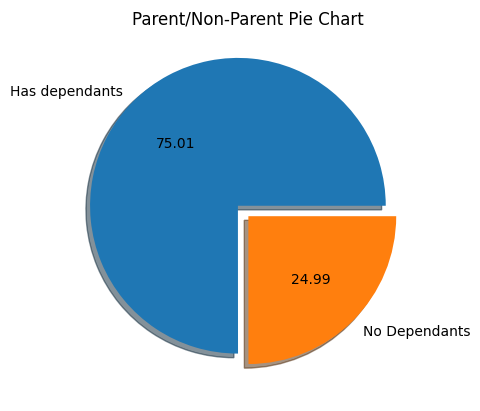

In [43]:
# create pie chart to show sales from customers with/without dependants
y = np.array([24307356, 8097503])
mylabels = ["Has dependants", "No Dependants"]
myexplode = [0.1, 0]

dep_pie = plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True)
plt.title('Parent/Non-Parent Pie Chart')
plt.show()

In [44]:
# Check frequencies of family status

order_products_all['marital_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

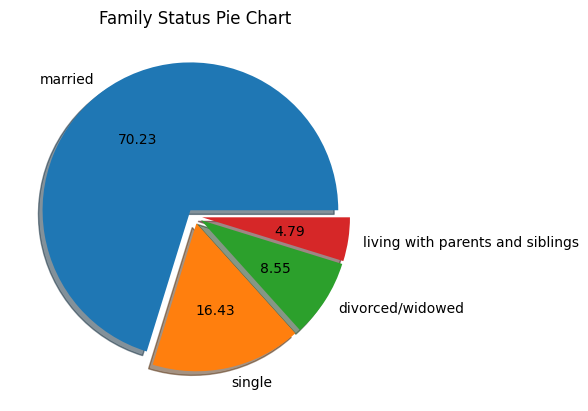

In [45]:
# create pie chart to show sales from family status
y = np.array([22756753, 5325691, 2771812, 1550603])
mylabels = ["married", "single", "divorced/widowed", "living with parents and siblings"]
myexplode = [0.05, 0.05, 0.05, 0.05]

dep_pie = plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True)
plt.title('Family Status Pie Chart')
plt.show()

### 1.7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [46]:
# Checking that outliers have been removed from previous exercise

order_products_all.loc[order_products_all['prices'] > 100]

Output hidden; open in https://colab.research.google.com to view.

In [47]:
# replacing outlier values with nan

order_products_all.loc[order_products_all['prices'] >100, 'prices'] = np.nan

In [48]:
# Checking max price in column

order_products_all['prices'].max()

25.0

In [49]:
# Aggregate customer profiles for expenditure

order_products_all.groupby('customer_profile').agg({'prices':['mean', 'min', 'max']})

prices           
                               mean  min   max
customer_profile                              
Average income non-parent  7.917263  1.0  25.0
Average income parent      7.913995  1.0  25.0
High income non-parent     7.947644  1.0  25.0
High income parent         7.960400  1.0  25.0
Low income non-parent      6.703831  1.0  25.0
Low income parent          6.694685  1.0  25.0

In [50]:
# Aggregate customer profile for usage frequency

order_products_all.groupby('customer_profile').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                            mean  min   max
customer_profile                                           
Average income non-parent              11.079065  0.0  30.0
Average income parent                  11.044624  0.0  30.0
High income non-parent                 10.908433  0.0  30.0
High income parent                     11.063297  0.0  30.0
Low income non-parent                  11.511669  0.0  30.0
Low income parent                      11.612627  0.0  30.0

### 1.8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

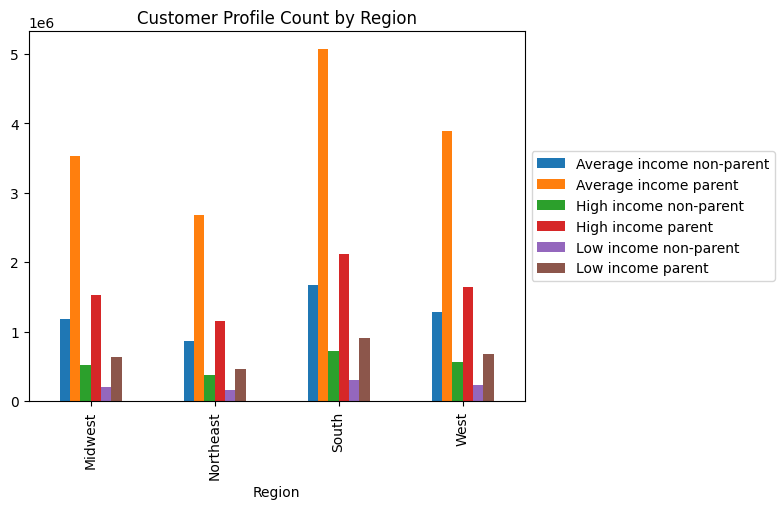

In [51]:
# plot bar chart for customer profile count by region

region_info = order_products_all.groupby(['Region', 'customer_profile']).size().unstack(fill_value = 0)
region_bar = region_info.plot.bar()
plt.title('Customer Profile Count by Region')
plt.subplot().legend(loc='center left',bbox_to_anchor = (1, 0.5))
plt.show()

In [52]:
# Create department column

order_products_all.loc[order_products_all['department_id'] == 1, 'department'] = 'frozen'
order_products_all.loc[order_products_all['department_id'] == 2, 'department'] = 'other'
order_products_all.loc[order_products_all['department_id'] == 3, 'department'] = 'bakery'
order_products_all.loc[order_products_all['department_id'] == 4, 'department'] = 'produce'
order_products_all.loc[order_products_all['department_id'] == 5, 'department'] = 'alcohol'
order_products_all.loc[order_products_all['department_id'] == 6, 'department'] = 'international'
order_products_all.loc[order_products_all['department_id'] == 7, 'department'] = 'beverages'
order_products_all.loc[order_products_all['department_id'] == 8, 'department'] = 'pets'
order_products_all.loc[order_products_all['department_id'] == 9, 'department'] = 'dry goods'
order_products_all.loc[order_products_all['department_id'] == 10, 'department'] = 'bulk'
order_products_all.loc[order_products_all['department_id'] == 11, 'department'] = 'personal care'
order_products_all.loc[order_products_all['department_id'] == 12, 'department'] = 'meat seafood'
order_products_all.loc[order_products_all['department_id'] == 13, 'department'] = 'pantry'
order_products_all.loc[order_products_all['department_id'] == 14, 'department'] = 'breakfast'
order_products_all.loc[order_products_all['department_id'] == 15, 'department'] = 'canned goods'
order_products_all.loc[order_products_all['department_id'] == 16, 'department'] = 'dairy eggs'
order_products_all.loc[order_products_all['department_id'] == 17, 'department'] = 'household'
order_products_all.loc[order_products_all['department_id'] == 18, 'department'] = 'babies'
order_products_all.loc[order_products_all['department_id'] == 19, 'department'] = 'snacks'
order_products_all.loc[order_products_all['department_id'] == 20, 'department'] = 'deli'
order_products_all.loc[order_products_all['department_id'] == 21, 'department'] = 'missing'

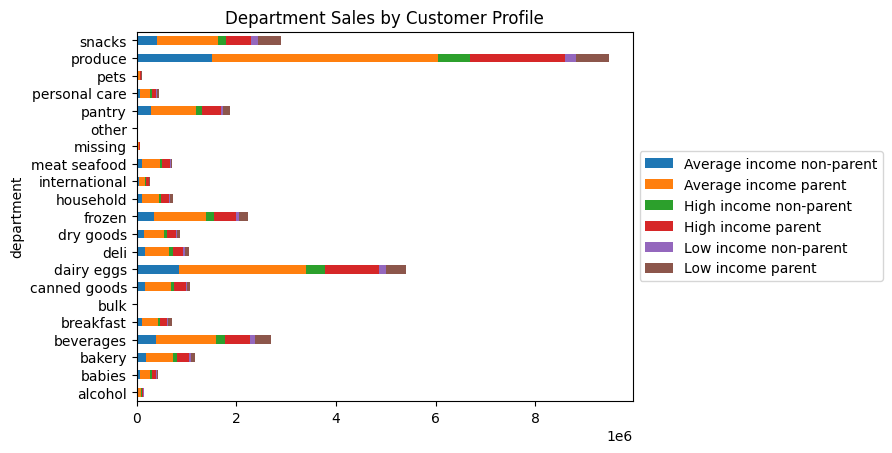

In [53]:
# Plot bar chart for customer profile sales by department

department_info = order_products_all.groupby(["department", "customer_profile"]).size().unstack(fill_value = 0)
department_bar = department_info.plot.barh(stacked = True)
plt.title('Department Sales by Customer Profile')
plt.subplot().legend(loc='center left',bbox_to_anchor = (1, 0.5))
plt.show()

Average and high income parents account for the majority of sales across all departments and each region follows the same pattern of distribution

### 1.9 Produce suitable charts to illustrate your results and export them in your project folder.

### 1.9.1
### Question 1) Busiest day of week / time of day

In [54]:
# Create day of week column for better graph labelling

result = []

for value in order_products_all['orders_day_of_week']:
  if value == 0:
    result.append('Saturday')
  elif value == 1:
    result.append('Sunday')
  elif value == 2:
    result.append('Monday')
  elif value == 3:
    result.append('Tuesday')
  elif value == 4:
    result.append('Wednesday')
  elif value == 5:
    result.append('Thursday')
  else:
    result.append('Friday')

In [55]:
# Create day of week column for better graph labelling

order_products_all['day_of_week'] = result

In [56]:
# Check frequencies of each day of the week

order_products_all['day_of_week'].value_counts()

Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: day_of_week, dtype: int64

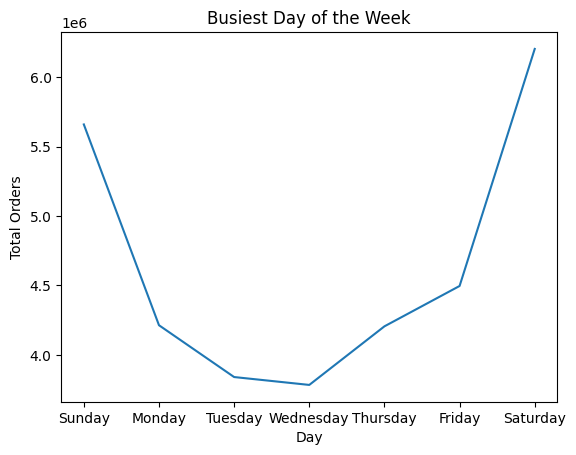

In [57]:
# Create line chart for busiest day of week

Day = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
Orders = [5660230, 4213830,3840534,3783802,4205791,4496490,6204182]
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.plot(Day, Orders)

plt.xlabel("Day")
plt.ylabel("Total Orders")
plt.title("Busiest day of week")
plt.xticks(Day, labels)
plt.title('Busiest Day of the Week')
plt.show()

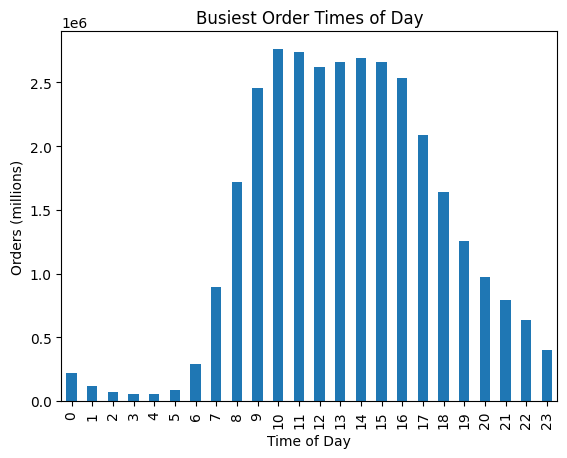

In [58]:
# Create bar chart to show busiest times of day

order_products_all['order_time_of_day'].value_counts().sort_index().plot.bar(title = 'Busiest Order Times of Day', xlabel='Time of Day', ylabel='Orders (millions)')
plt.show()

### 1.9.2

### Question 2) Prices for different times of day

In [59]:
# Aggregate average price for each hour of the day

order_products_all.groupby('order_time_of_day').agg({'prices' :['mean']})

,prices
,mean
order_time_of_day,
0,7.811152
1,7.805706
2,7.799211
3,7.828101
4,7.838612
5,7.828162
6,7.817802
7,7.820043


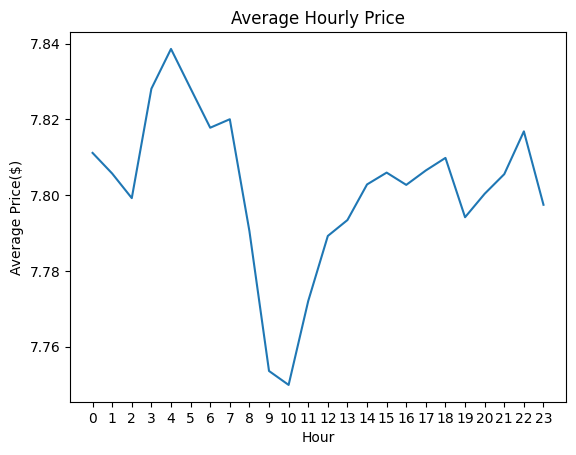

In [60]:
# Create line chart to show changes in hourly average price

Hour = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
Price = [7.811152, 7.805706, 7.799211, 7.828101,7.838612,7.828162,7.817802
         ,7.820043,7.790509,7.753561,7.749879,7.772038,7.789222,7.793418
         ,7.802823,7.805949,7.802705,7.806522,7.809833,7.794163,7.800359,7.805543,7.816838,7.797452]
labels = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
plt.plot(Hour, Price)

plt.xlabel("Hour")
plt.ylabel("Average Price($)")
plt.title("Average Hourly Price")
plt.xticks(Hour, labels)

plt.show()

In [61]:
# Show average order price by department

order_products_all.groupby('department').agg({'prices' :['mean']})

,prices
,mean
department,
alcohol,8.143701
babies,7.638380
bakery,7.853809
beverages,7.680502
breakfast,8.028963
bulk,8.348960
canned goods,7.539976
dairy eggs,8.335056


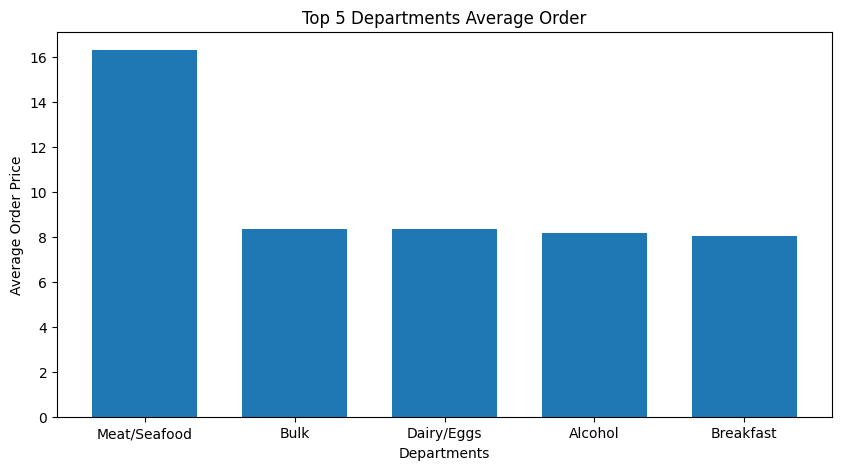

In [62]:
# Plot bar graph showing top 5 departments

data = {'Meat/Seafood':16.294443, 'Bulk':8.348960,
        'Dairy/Eggs':8.335056, 'Alcohol':8.143701, 'Breakfast':8.028963}
department = list(data.keys())
average_order_price = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(department, average_order_price,
        width = 0.7)

plt.xlabel("Departments")
plt.ylabel("Average Order Price")
plt.title("Top 5 Departments Average Order")
plt.show()

### 1.9.3
### Question 3) Simpler price range groupings

In [63]:
# Check frequencies of price range groupings

order_products_all['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

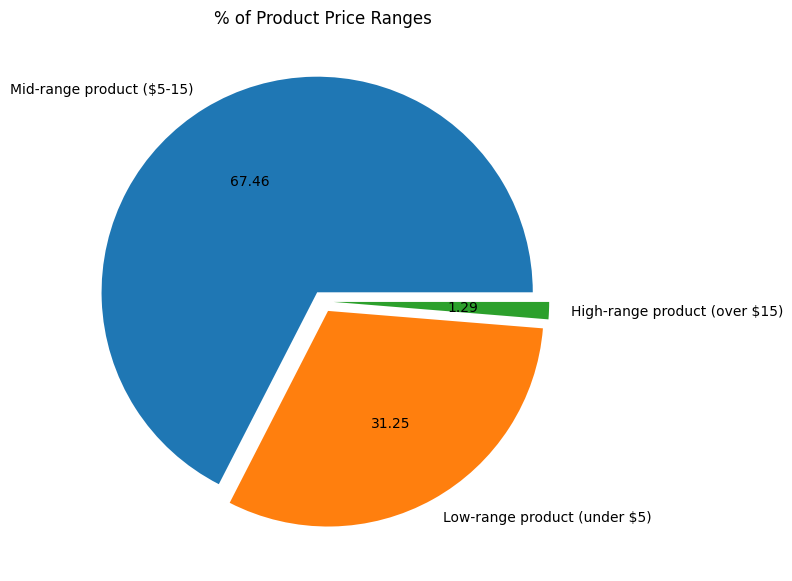

In [64]:
# Create pie chart to show size of price range groupings

price_range = ['Mid-range product ($5-15)', 'Low-range product (under $5)', 'High-range product (over $15)']

data = [21860860, 10126321, 417678]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = price_range, autopct='%.2f', explode = [0.05, 0.05, 0.05])
plt.title('% of Product Price Ranges')

# show plot
plt.show()


### 1.9.4
### Question 4) Most popular departments

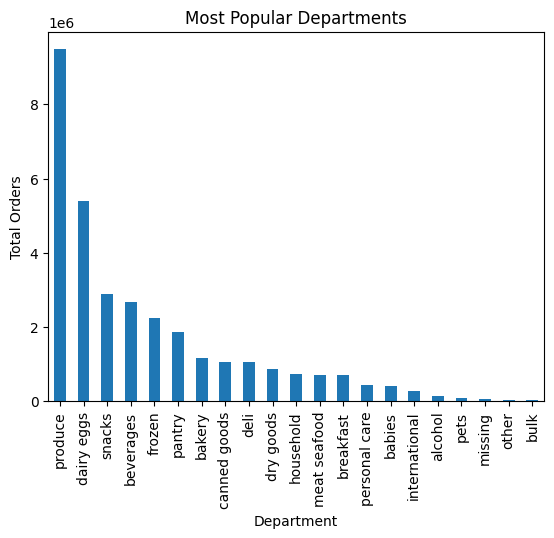

In [65]:
# Create bar chart to show most popular departments

order_products_all['department'].value_counts(dropna = False).plot.bar()
plt.title('Most Popular Departments')
plt.ylabel("Total Orders")
plt.xlabel("Department")
plt.show()

### 1.9.5
### Question 5) Distribution of brand loyalty

In [66]:
# Check frequencies of loyalty groups

order_products_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

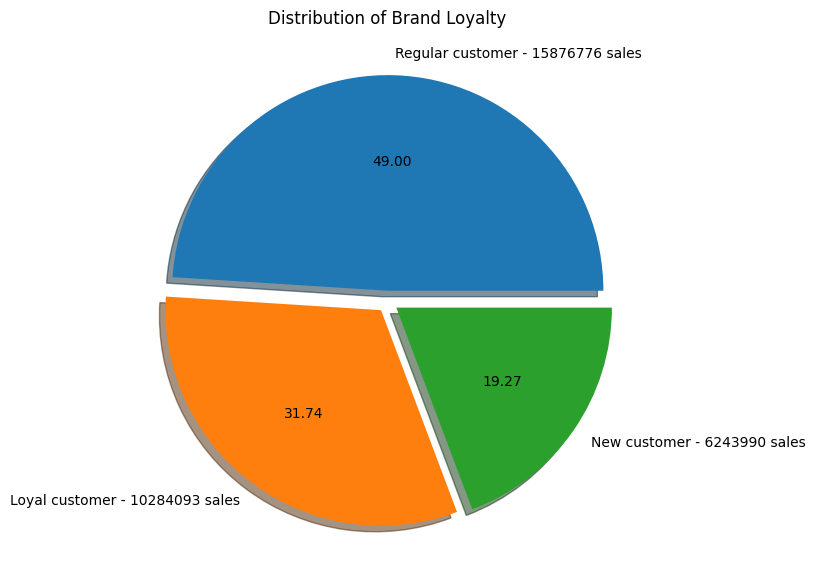

In [67]:
# Create pie chart to show size of loyalty groups

loyalty_group = ['Regular customer - 15876776 sales', 'Loyal customer - 10284093 sales', 'New customer - 6243990 sales']

data = [15876776, 10284093, 6243990]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = loyalty_group, autopct='%.2f', explode = [0.05, 0.05, 0.05], shadow = True)

plt.title('Distribution of Brand Loyalty')
# show plot
plt.show()

### 1.9.6
### Question 6) Differences in ordering habits based on loyalty

In [68]:
# Create crosstab for weekly orders by loyalty group

loyalty_output = pd.crosstab(order_products_all['orders_day_of_week'], order_products_all['loyalty_flag'], dropna = False)

In [69]:
# Show loyalty output

loyalty_output

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,1280451,3169000
1,1843401,1067446,2749383
2,1352343,814412,2047075
3,1266495,731417,1842622
4,1292042,694739,1797021
5,1456715,759780,1989296
6,1318366,895745,2282379


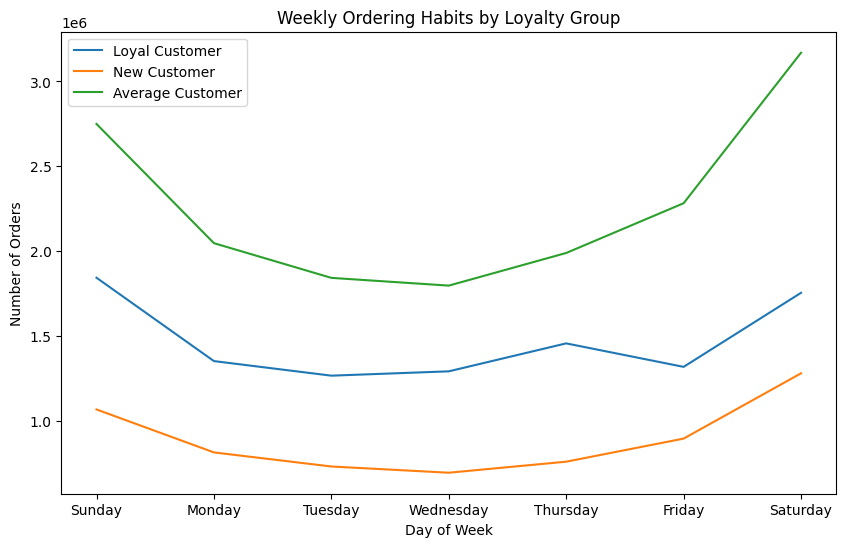

In [70]:
# Create line chart showing ordering habits of loyalty groups

x = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
y = [1843401,1352343,1266495,1292042,1456715,1318366,1754731]
y2 = [1067446,814412,731417,694739,759780,895745,1280451]
y3 = [2749383,2047075,1842622,1797021,1989296,2282379,3169000]



fig= plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Weekly Ordering Habits by Loyalty Group')
plt.legend(['Loyal Customer', 'New Customer','Average Customer'])
plt.show()

In [71]:
# Create crosstab for hourly orders by loyalty group

loyalty_days_output = pd.crosstab(order_products_all['order_time_of_day'], order_products_all['loyalty_flag'], dropna = False)

In [72]:
# Check hourly order crosstab

loyalty_days_output

loyalty_flag,Loyal customer,New customer,Regular customer
order_time_of_day,,,
0,61748,46038,110983
1,30179,26753,58768
2,17788,15925,35662
3,13374,11995,25912
4,16882,10921,25439
5,29350,16018,42593
6,112865,43381,134247
7,346694,130011,414349
8,643895,267132,807091


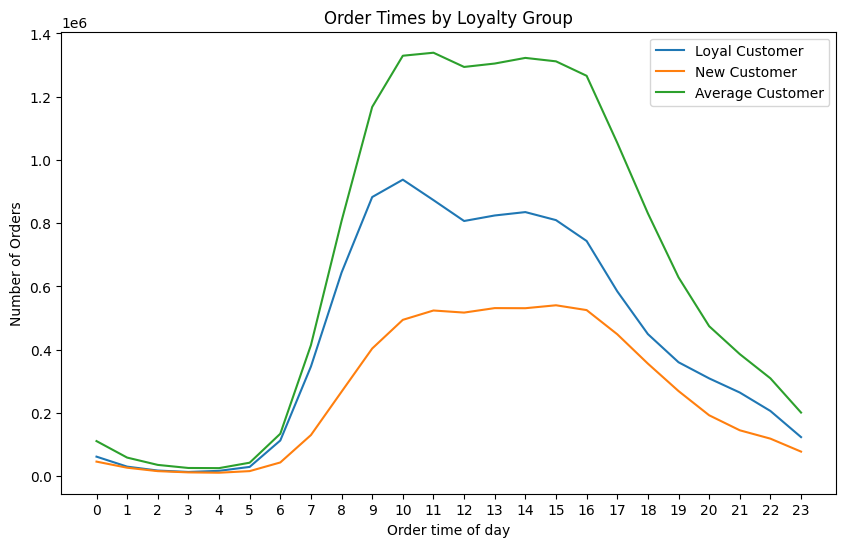

In [73]:
# plot line chart for loyalty groups and order times

x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
y = [61748,30179,17788,13374,16882,29350,112865,346694,643895,882740,937669,873024,807001,824465,835162,809777,743761,584602,449336,360292,309270,264537,206150,123532]
y2 = [46038,26753,15925,11995,10921,16018,43381,130011,267132,403735,494425,523944,517347,531525,531180,540461,525256,448828,355925,269199,192584,145114,118649,77644]
y3 = [110983,58768,35662,25912,25439,42593,134247,414349,807091,1167728,1329666,1339172,1294184,1304964,1322794,1311906,1266185,1054224,831241,628814,474302,385986,309426,201140]


fig= plt.figure(figsize=(10,6))
plt.xlabel("Order time of day")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Order Times by Loyalty Group')
plt.legend(['Loyal Customer', 'New Customer','Average Customer'])
plt.show()

In [74]:
# Aggregate average days between order by loyalty group

order_products_all.groupby('loyalty_flag').agg({'days_since_prior_order' :['mean']})

,days_since_prior_order
,mean
loyalty_flag,
Loyal customer,6.026656
New customer,17.976934
Regular customer,12.155136


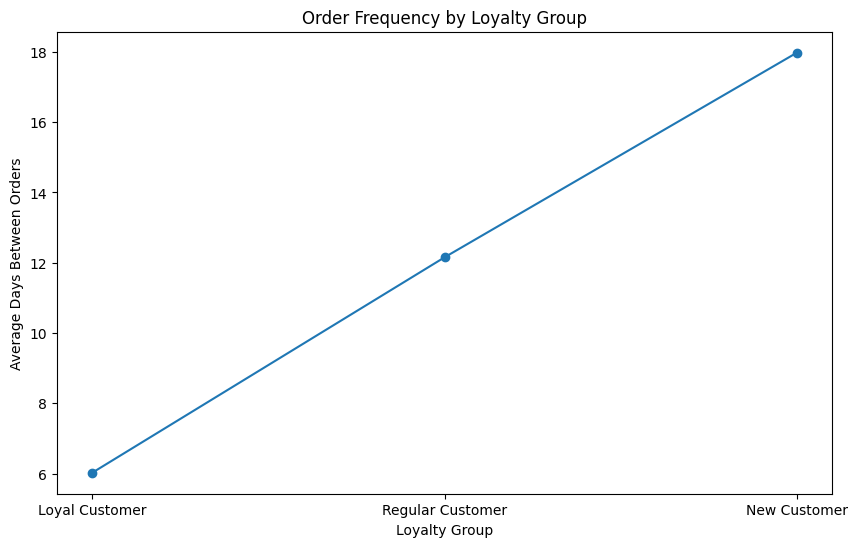

In [75]:
# Create line chart showing ordering habits of loyalty groups (order frequency)

x = ['Loyal Customer','Regular Customer','New Customer']
y = [6.026656, 12.155136, 17.976934]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Loyalty Group")
plt.ylabel("Average Days Between Orders")
plt.plot(x,y, marker='o')

plt.title('Order Frequency by Loyalty Group')
plt.show()

In [76]:
# Aggregate average order value by loyalty group

order_products_all.groupby('loyalty_flag').agg({'average_order' :['mean']})

,average_order
,mean
loyalty_flag,
Loyal customer,10.386312
New customer,13.294516
Regular customer,12.495740


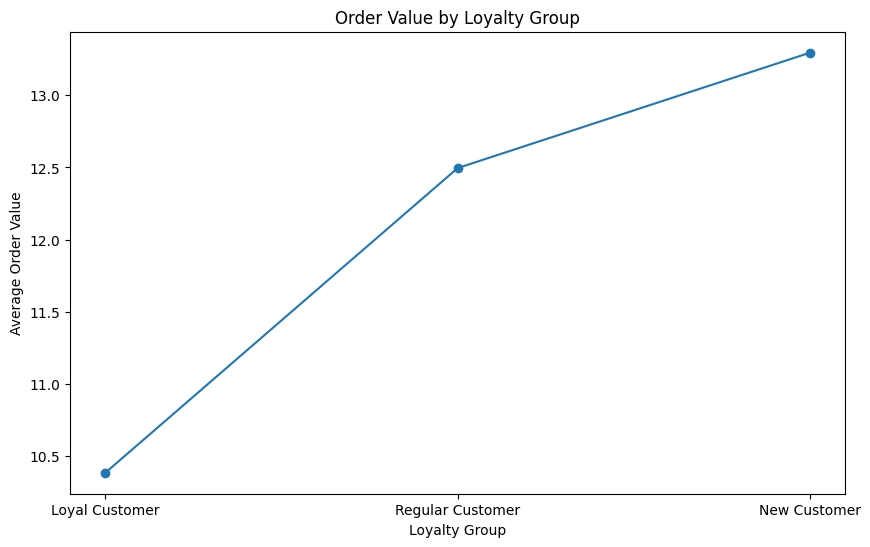

In [77]:
# Create line chart showing ordering habits of loyalty groups (order value)

x = ['Loyal Customer','Regular Customer','New Customer']
y = [10.386312, 12.495740, 13.294516]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Loyalty Group")
plt.ylabel("Average Order Value")
plt.plot(x,y, marker='o')

plt.title('Order Value by Loyalty Group')
plt.show()

### 1.9.7
### Question 7) Difference in ordering habits based on region

In [78]:
# Create crosstab for weekly orders by region

region_output = pd.crosstab(order_products_all['orders_day_of_week'], order_products_all['Region'], dropna = False)

In [79]:
# Show region output

region_output

Region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1460186,1097258,2052776,1593962
1,1320759,999953,1892057,1447461
2,991770,746153,1404662,1071245
3,895093,679308,1287335,978798
4,888131,666326,1258537,970808
5,983262,746455,1399737,1076337
6,1058124,787283,1496781,1154302


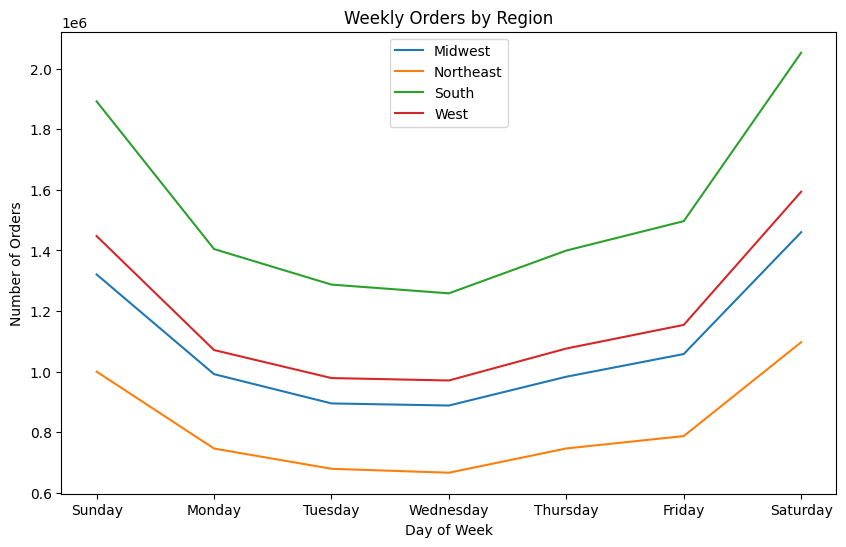

In [80]:
# Create line chart for regional weekly orders

x = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
y = [1320759,991770,895093,888131,983262,1058124,1460186]
y2 = [999953,746153,679308,666326,746455,787283,1097258]
y3 = [1892057,1404662,1287335,1258537,1399737,1496781,2052776]
y4 = [1447461,1071245,978798,970808,1076337,1154302,1593962]


fig= plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(['Midwest','Northeast','South','West'])
plt.title('Weekly Orders by Region')
plt.show()

In [81]:
# Create crosstab for hourly orders by region

region_days_output = pd.crosstab(order_products_all['order_time_of_day'], order_products_all['Region'], dropna = False)

In [82]:
# Check region days crosstab

region_days_output

Region,Midwest,Northeast,South,West
order_time_of_day,,,,
0,50748,38557,73297,56167
1,27360,21543,37906,28891
2,16987,12436,21980,17972
3,11909,9218,17437,12717
4,12690,9507,17966,13079
5,19858,15395,30838,21870
6,67296,50545,98696,73956
7,208272,158950,297744,226088
8,398142,305344,579045,435587


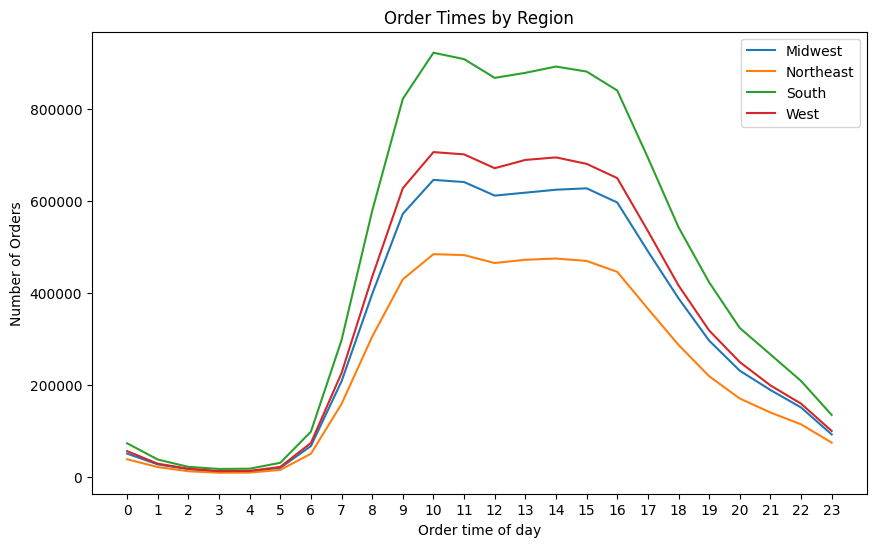

In [83]:
# plot line chart for regional order times

x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
y = [50748,27360,16987,11909,12690,19858,67296,208272,398142,572839,646591,641858,612342,618737,625122,628164,597360,491290,388755,296696,231243,189302,151260,92504]
y2 = [38557,21543,12436,9218,9507,15395,50545,158950,305344,430111,484872,482845,465634,472706,475355,470195,446411,366163,287375,219259,170719,140342,114499,74755]
y3 = [73297,37906,21980,17437,17966,30838,98696,297744,579045,822853,923301,909371,868596,879532,893190,882322,841034,694879,543568,423557,324171,266730,208898,134974]
y4 = [56167,28891,17972,12717,13079,21870,73956,226088,435587,628400,706996,702066,671960,689979,695469,681463,650397,535322,416804,318793,250023,199263,159568,100083]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Order time of day")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.title('Order Times by Region')
plt.legend(['Midwest', 'Northeast','South','West'])
plt.show()

In [84]:
# Aggregate average days between order by loyalty group

order_products_all.groupby('Region').agg({'days_since_prior_order' :['mean']})

,days_since_prior_order
,mean
Region,
Midwest,11.181836
Northeast,11.075769
South,11.108108
West,11.047195


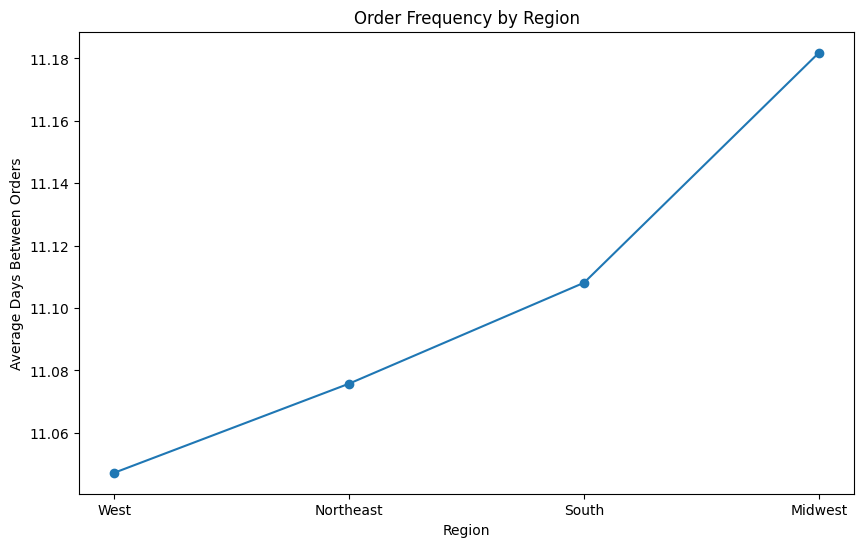

In [85]:
# Create line chart showing ordering habits of region (order frequency)

x = ['West','Northeast','South','Midwest']
y = [11.047195, 11.075769, 11.108108, 11.181836]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Region")
plt.ylabel("Average Days Between Orders")
plt.plot(x,y, marker='o')

plt.title('Order Frequency by Region')
plt.show()

In [142]:
# Aggregate average order value by loyalty group

order_products_all.groupby('Region').agg({'average_order' :['mean']})

,average_order
,mean
Region,
Midwest,12.715347
Northeast,11.555049
South,12.195603
West,11.319790


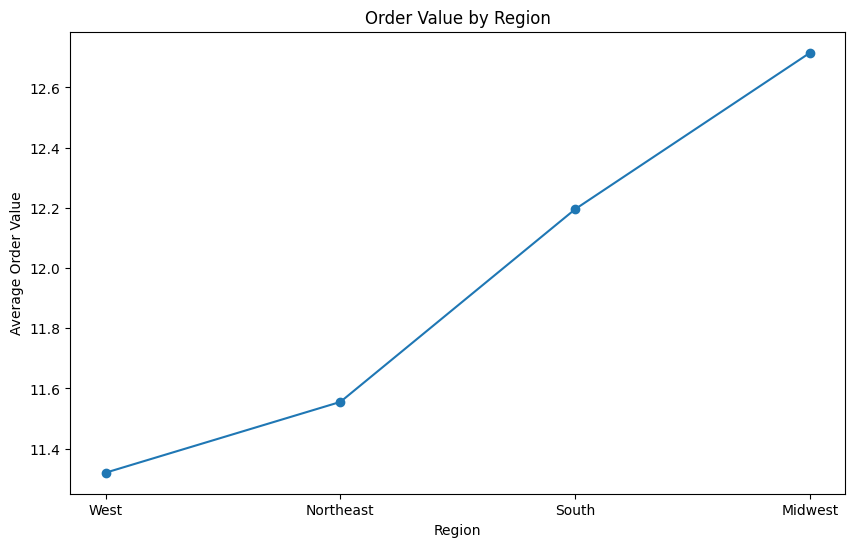

In [143]:
# Create line chart showing ordering habits of region (average order)

x = ['West','Northeast','South','Midwest']
y = [11.319790, 11.555049, 12.195603, 12.715347]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Region")
plt.ylabel("Average Order Value")
plt.plot(x,y, marker='o')

plt.title('Order Value by Region')
plt.show()

### 1.9.8
### Question 8) Is there a connection with age/family status for ordering habits

AGE

In [86]:
# Create crosstab for order times by age group

ageoutput = pd.crosstab(order_products_all['age_group'], order_products_all['order_time_of_day'], dropna = False)

In [87]:
# Check order time by age crosstab

ageoutput

order_time_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
age_group,,,,,,,,,,,,,,,,,,,,,,,,
Middle-aged Adult,105815,55932,32887,24100,25221,41901,137688,428487,834061,1186525,1336612,1325938,1269505,1295606,1301547,1294874,1229114,1017256,796436,608335,473005,384774,306635,197209
Senior adult,56612,30136,18310,13967,14327,24049,77589,240259,456844,651537,728895,719648,692296,700893,712826,696360,669293,552910,436947,336353,258047,212831,167642,106513
Young adult,56342,29632,18178,13214,13694,22011,75216,222308,427213,616141,696253,690554,656731,664455,674763,670910,636795,517488,403119,313617,245104,198032,159948,98594


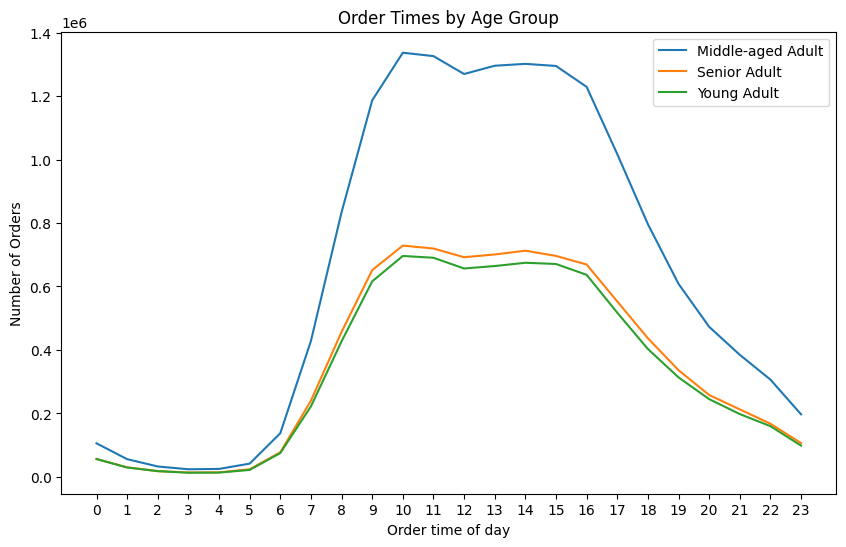

In [88]:
# plot line chart for age_group order times

x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
y = [105815,55932,32887,24100,25221,41901,137688,428487,834061,1186525,1336612,1325938,1269505,1295606,1301547,1294874,1229114,1017256,796436,608335,473005,384774,306635,197209]
y2 = [56612,30136,18310,13967,14327,24049,77589,240259,456844,651537,728895,719648,692296,700893,712826,696360,669293,552910,436947,336353,258047,212831,167642,106513]
y3 = [56342,29632,18178,13214,13694,22011,75216,222308,427213,616141,696253,690554,656731,664455,674763,670910,636795,517488,403119,313617,245104,198032,159948,98594]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Order time of day")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Order Times by Age Group')
plt.legend(['Middle-aged Adult','Senior Adult','Young Adult'])
plt.show()

In [89]:
# Create crosstab for weekly orders by age group

ageoutput2 = pd.crosstab(order_products_all['day_of_week'], order_products_all['age_group'], dropna = False)

In [90]:
# Check weekly orders crosstab

ageoutput2

age_group,Middle-aged Adult,Senior adult,Young adult
day_of_week,,,
Friday,2179406,1199815,1117269
Monday,2049094,1114364,1050372
Saturday,3001791,1643234,1559157
Sunday,2742788,1483125,1434317
Thursday,2037577,1113361,1054853
Tuesday,1862763,1022963,954808
Wednesday,1836044,998222,949536


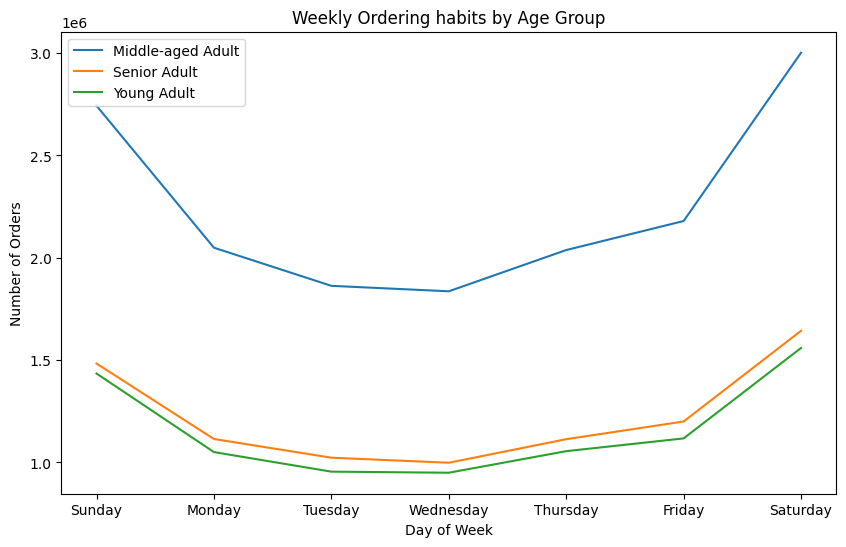

In [91]:
# Create weekly order line chart by age group

x = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
y = [2742788,2049094,1862763,1836044,2037577,2179406,3001791]
y2 = [1483125,1114364,1022963,998222,1113361,1199815,1643234]
y3 = [1434317,1050372,954808,949536,1054853,1117269,1559157]



fig= plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.title('Weekly Ordering habits by Age Group')
plt.legend(['Middle-aged Adult','Senior Adult','Young Adult'])
plt.show()

In [92]:
# Finding average order between age groups

order_products_all.groupby('age_group').agg({'average_order' :['mean']})

,average_order
,mean
age_group,
Middle-aged Adult,12.039709
Senior adult,11.768885
Young adult,12.088226


In [93]:
# Finding average order frequency by age group

order_products_all.groupby('age_group').agg({'days_since_prior_order' :['mean']})

,days_since_prior_order
,mean
age_group,
Middle-aged Adult,11.099869
Senior adult,11.078641
Young adult,11.139097


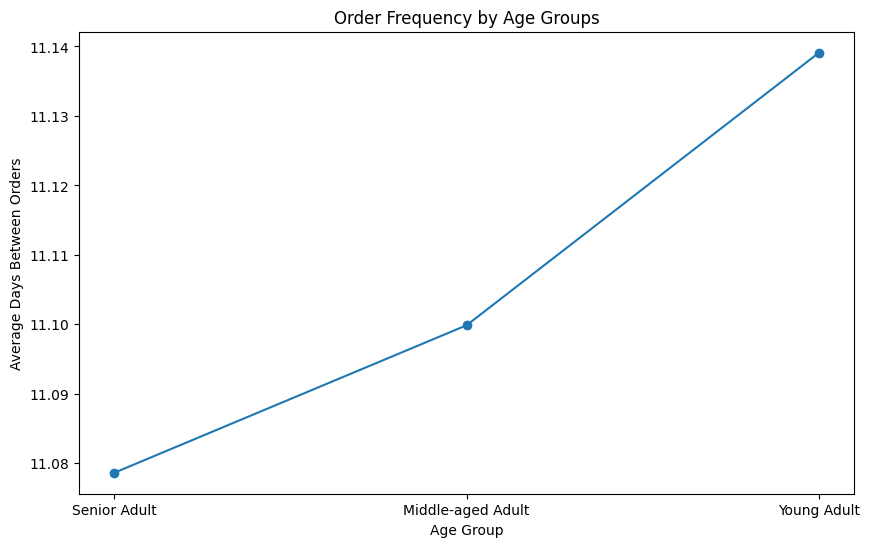

In [94]:

# Create line chart showing ordering habits of age groups (order frequency)

x = ['Senior Adult','Middle-aged Adult','Young Adult']
y = [11.078641, 11.099869, 11.139097]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Age Group")
plt.ylabel("Average Days Between Orders")
plt.plot(x,y, marker='o')

plt.title('Order Frequency by Age Groups')
plt.show()

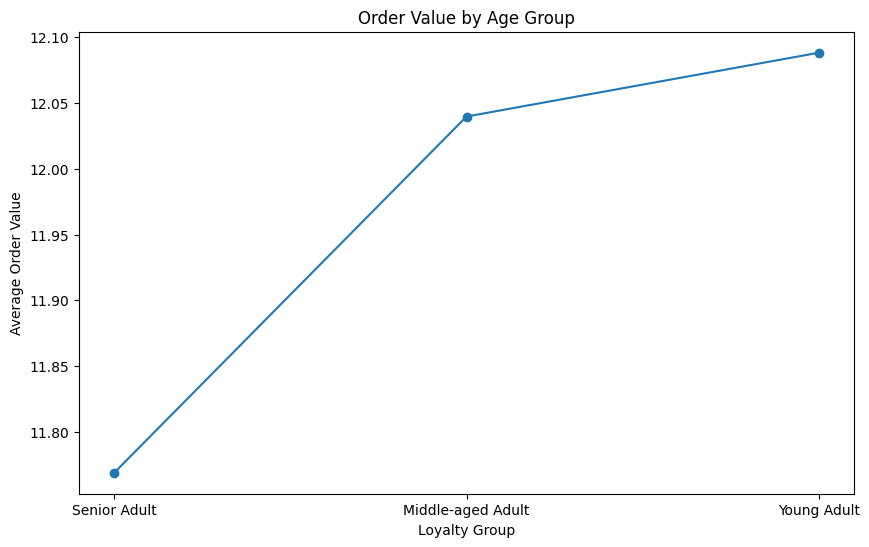

In [95]:
# Create line chart showing ordering habits of age groups (order value)

x = ['Senior Adult','Middle-aged Adult','Young Adult']
y = [11.768885, 12.039709, 12.088226]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Loyalty Group")
plt.ylabel("Average Order Value")
plt.plot(x,y, marker='o')

plt.title('Order Value by Age Group')
plt.show()

FAMILY STATUS

In [96]:
# Create crosstab for order times by family status

famoutput = pd.crosstab(order_products_all['marital_status'], order_products_all['order_time_of_day'], dropna = False)

In [97]:
# Check outout for crosstab

famoutput

order_time_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
marital_status,,,,,,,,,,,,,,,,,,,,,,,,
divorced/widowed,17127,9042,6497,4647,4183,8059,24426,79595,147715,207532,234040,231804,223641,226998,229579,228187,219160,177535,137976,110193,85579,69202,54156,34939
living with parents and siblings,11043,5946,3754,2602,2990,4554,15493,43855,78917,114702,132555,131068,124990,128022,129113,127191,121281,100466,78505,61004,45870,36977,30201,19504
married,153554,81412,48052,35664,37513,61355,201509,620228,1207702,1726471,1945172,1923410,1843646,1871869,1890469,1867455,1773231,1464860,1153816,881844,684472,559843,443533,279673
single,37045,19300,11072,8368,8556,13993,49065,147376,283784,405498,449993,449858,426255,434065,439975,439311,421530,344793,266205,205264,160235,129615,106335,68200


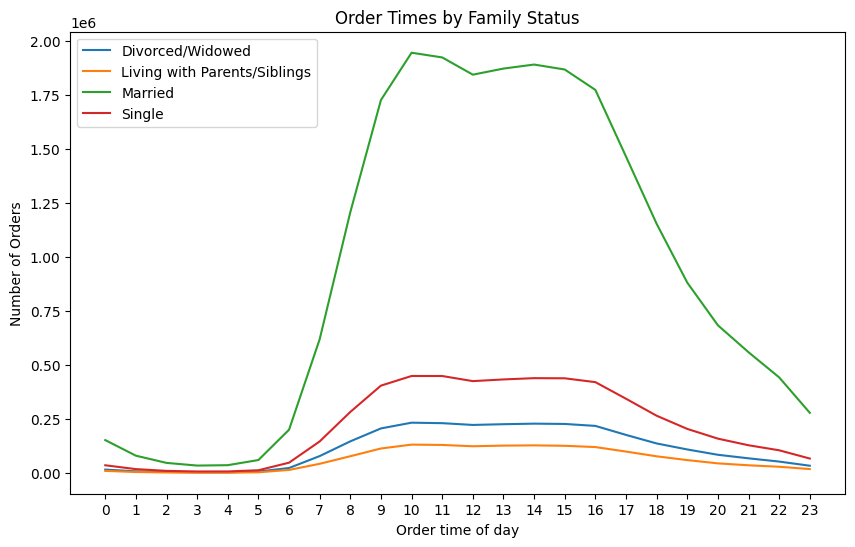

In [98]:
# plot line chart for family status order times

x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
y = [17127,9042,6497,4647,4183,8059,24426,79595,147715,207532,234040,231804,223641,226998,229579,228187,219160,177535,137976,110193,85579,69202,54156,34939]
y2 = [11043,5946,3754,2602,2990,4554,15493,43855,78917,114702,132555,131068,124990,128022,129113,127191,121281,100466,78505,61004,45870,36977,30201,19504]
y3 = [153554,81412,48052,35664,37513,61355,201509,620228,1207702,1726471,1945172,1923410,1843646,1871869,1890469,1867455,1773231,1464860,1153816,881844,684472,559843,443533,279673]
y4 = [37045,19300,11072,8368,8556,13993,49065,147376,283784,405498,449993,449858,426255,434065,439975,439311,421530,344793,266205,205264,160235,129615,106335,68200]
fig= plt.figure(figsize=(10,6))
plt.xlabel("Order time of day")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.title('Order Times by Family Status')
plt.legend(['Divorced/Widowed','Living with Parents/Siblings','Married','Single'])
plt.show()

In [99]:
# Create crosstab for weekly orders by family status

famoutput2 = pd.crosstab(order_products_all['day_of_week'], order_products_all['marital_status'], dropna = False)

In [100]:
# Check output for weekly orders crosstab

famoutput2

marital_status,divorced/widowed,living with parents and siblings,married,single
day_of_week,,,,
Friday,386485,216163,3168732,725110
Monday,359611,201511,2963190,689518
Saturday,528715,295224,4358649,1021594
Sunday,481073,271393,3964070,943694
Thursday,364215,203203,2945443,692930
Tuesday,330662,182315,2698866,628691
Wednesday,321051,180794,2657803,624154


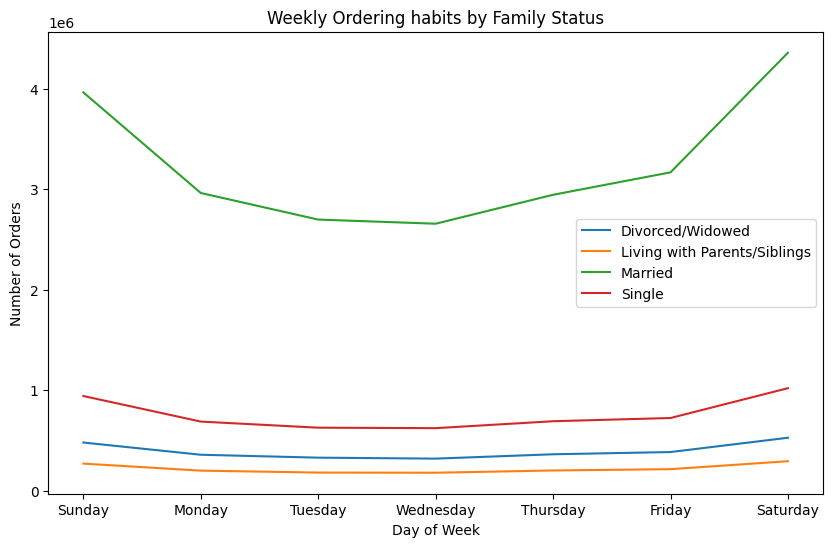

In [101]:
# Create line chart for weekly orders by family status

x = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
y = [481073,359611,330662,321051,364215,386485,528715]
y2 = [271393,201511,182315,180794,203203,216163,295224]
y3 = [3964070,2963190,2698866,2657803,2945443,3168732,4358649]
y4 = [943694,689518,628691,624154,692930,725110,1021594]


fig= plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.title('Weekly Ordering habits by Family Status')
plt.legend(['Divorced/Widowed','Living with Parents/Siblings','Married','Single'])
plt.show()

In [102]:
# Aggregate average order value by family status

order_products_all.groupby('marital_status').agg({'average_order' :['mean']})

,average_order
,mean
marital_status,
divorced/widowed,11.453620
living with parents and siblings,10.828472
married,12.005652
single,12.480838


In [103]:
# Aggregate order frequency by family status

order_products_all.groupby('marital_status').agg({'days_since_prior_order' :['mean']})

,days_since_prior_order
,mean
marital_status,
divorced/widowed,11.047780
living with parents and siblings,11.048170
married,11.116175
single,11.097992


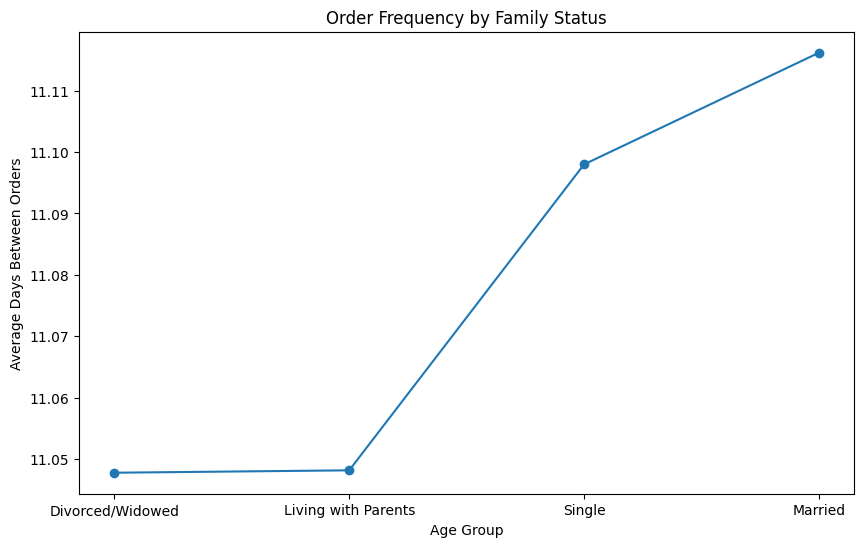

In [104]:
# Create line chart showing ordering habits by family status (order frequency)

x = ['Divorced/Widowed','Living with Parents','Single','Married']
y = [11.047780, 11.048170, 11.097992, 11.116175]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Age Group")
plt.ylabel("Average Days Between Orders")
plt.plot(x,y, marker='o')

plt.title('Order Frequency by Family Status')
plt.show()

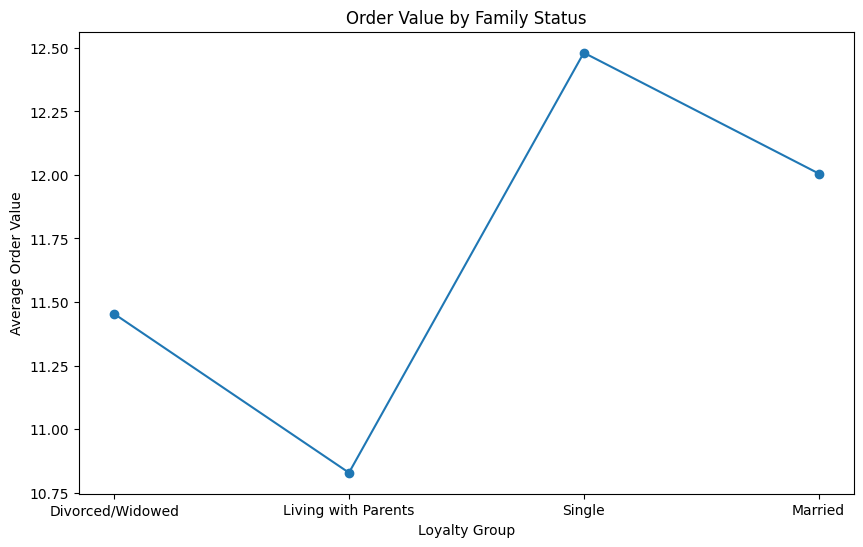

In [105]:
# Create line chart showing ordering habits by family status (order value)

x = ['Divorced/Widowed','Living with Parents','Single','Married']
y = [11.453620, 10.828472, 12.480838, 12.005652]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Loyalty Group")
plt.ylabel("Average Order Value")
plt.plot(x,y, marker='o')

plt.title('Order Value by Family Status')
plt.show()

### 1.9.9
### Question 9) What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

In [106]:
# Check frequencies of age groups

order_products_all['age_group'].value_counts()

Middle-aged Adult    15709463
Senior adult          8575084
Young adult           8120312
Name: age_group, dtype: int64

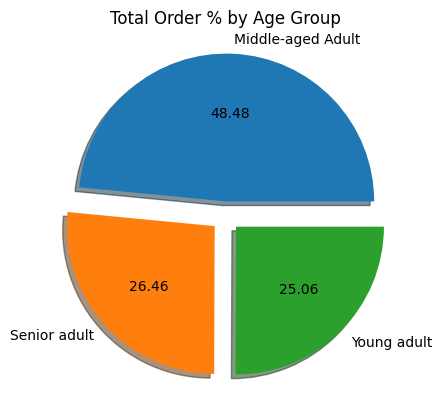

In [107]:
# create pie chart to show orders by age
y = np.array([15709463, 8575084, 8120312])
mylabels = ["Middle-aged Adult", "Senior adult", "Young adult"]
myexplode = [0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True,)
plt.title('Total Order % by Age Group')
plt.show()

In [108]:
# Check frequences of income groups

order_products_all['income_group'].value_counts()

Average income    20179819
High income        8630957
Low income         3594083
Name: income_group, dtype: int64

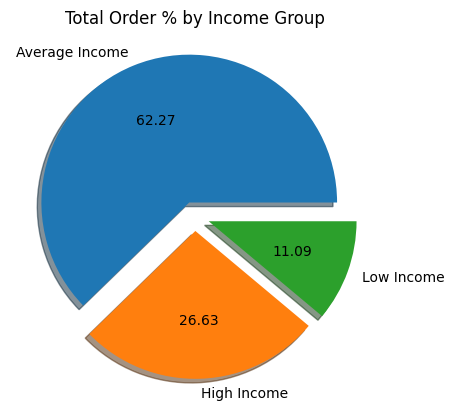

In [109]:
# create pie chart to show orders by income
y = np.array([20179819, 8630957, 3594083])
mylabels = ["Average Income", "High Income", "Low Income"]
myexplode = [0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True,)
plt.title('Total Order % by Income Group')
plt.show()

In [110]:
# Check frequences by family status

order_products_all['marital_status'].value_counts()

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

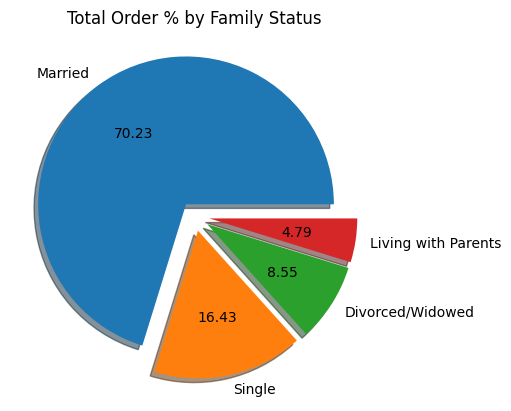

In [111]:
# create pie chart to show orders by family status
y = np.array([22756753, 5325691, 2771812, 1550603])
mylabels = ["Married", "Single", "Divorced/Widowed", "Living with Parents"]
myexplode = [0.1, 0.1, 0.1, 0.1]

plt.pie(y, labels = mylabels, explode = myexplode, autopct='%.2f', shadow = True,)
plt.title('Total Order % by Family Status')
plt.show()

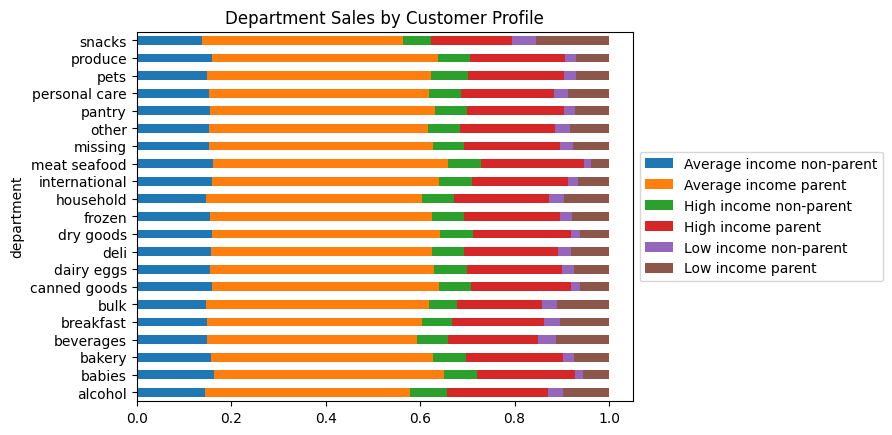

In [112]:
# Create 100% bar chart to show distribution of department orders by customer profile

order_products_all.groupby('department')['customer_profile'].value_counts(normalize=True).unstack('customer_profile').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Customer Profile')
plt.show()

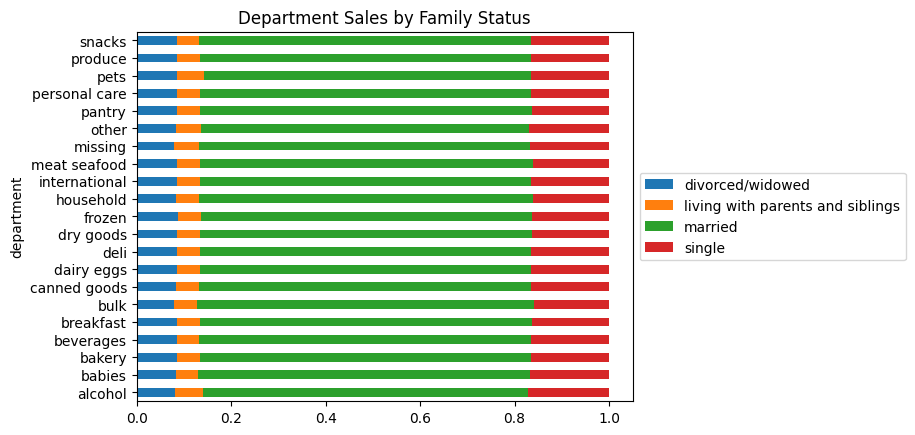

In [113]:
# Create 100% bar chart to show distribution of department orders by family status

order_products_all.groupby('department')['marital_status'].value_counts(normalize=True).unstack('marital_status').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Family Status')
plt.show()

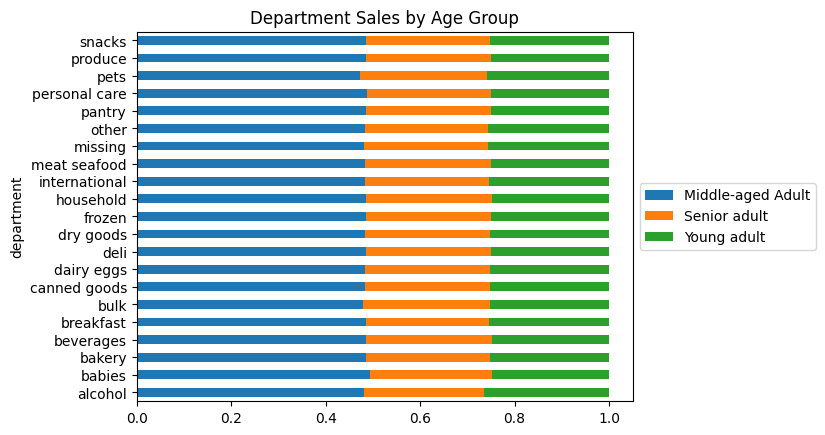

In [114]:
# Create 100% bar chart to show distribution of department orders by age group
order_products_all.groupby('department')['age_group'].value_counts(normalize=True).unstack('age_group').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Age Group')
plt.show()

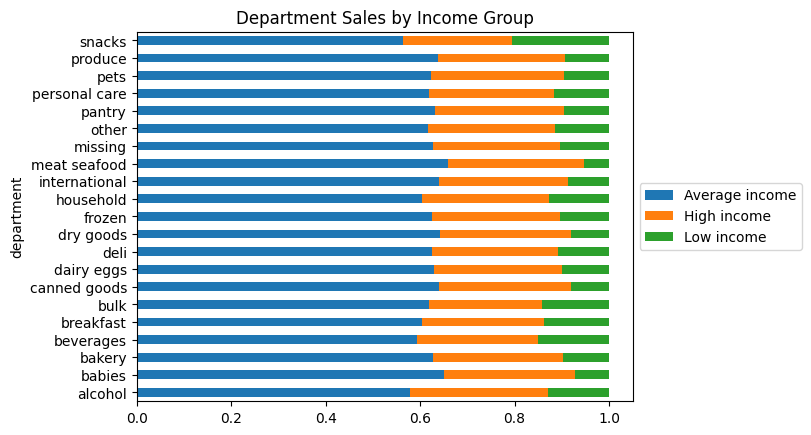

In [115]:
# Create 100% bar chart to show distribution of department orders by income group
order_products_all.groupby('department')['income_group'].value_counts(normalize=True).unstack('income_group').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Income Group')
plt.show()

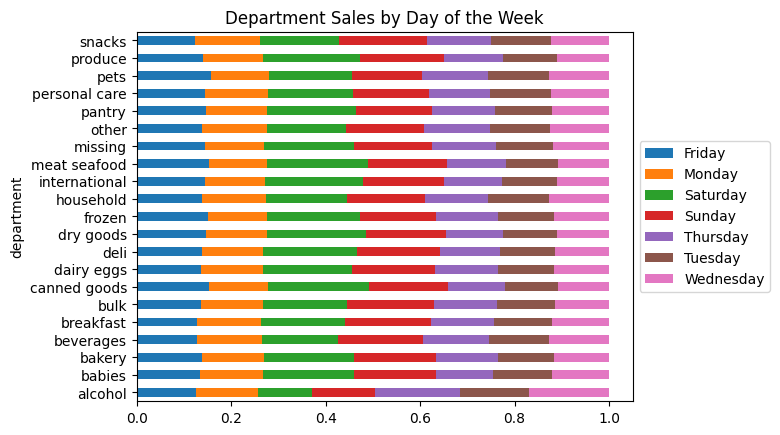

In [116]:
# Create 100% bar chart to show distribution of department orders by day of the week
order_products_all.groupby('department')['day_of_week'].value_counts(normalize=True).unstack('day_of_week').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Day of the Week')
plt.show()

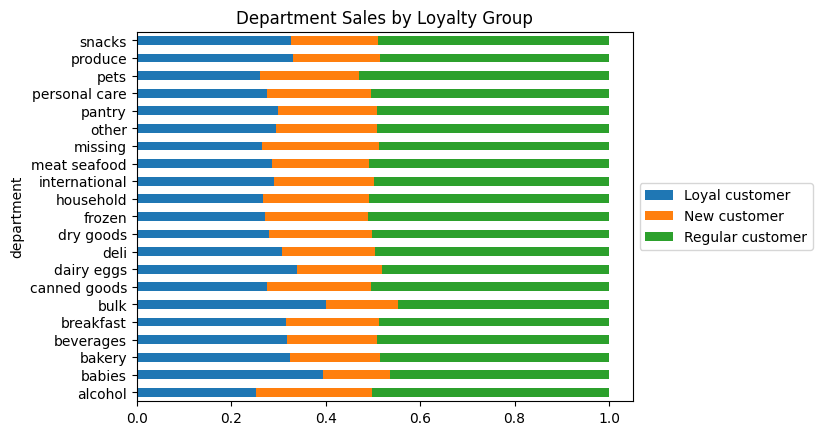

In [117]:
# Create 100% bar chart to show distribution of department orders by loyalty group

order_products_all.groupby('department')['loyalty_flag'].value_counts(normalize=True).unstack('loyalty_flag').plot.barh(stacked=True)
plt.subplot().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Sales by Loyalty Group')
plt.show()

### 1.9.10
### Question 10) What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [118]:
# Create 100% bar chart to show distribution of department orders by customer profile

dep_order_perc = pd.crosstab(index=order_products_all['department'],
                             columns=order_products_all['customer_profile'],
                             normalize="index")

dep_order_perc_label = pd.crosstab(index=order_products_all['department'],
                             columns=order_products_all['customer_profile'])

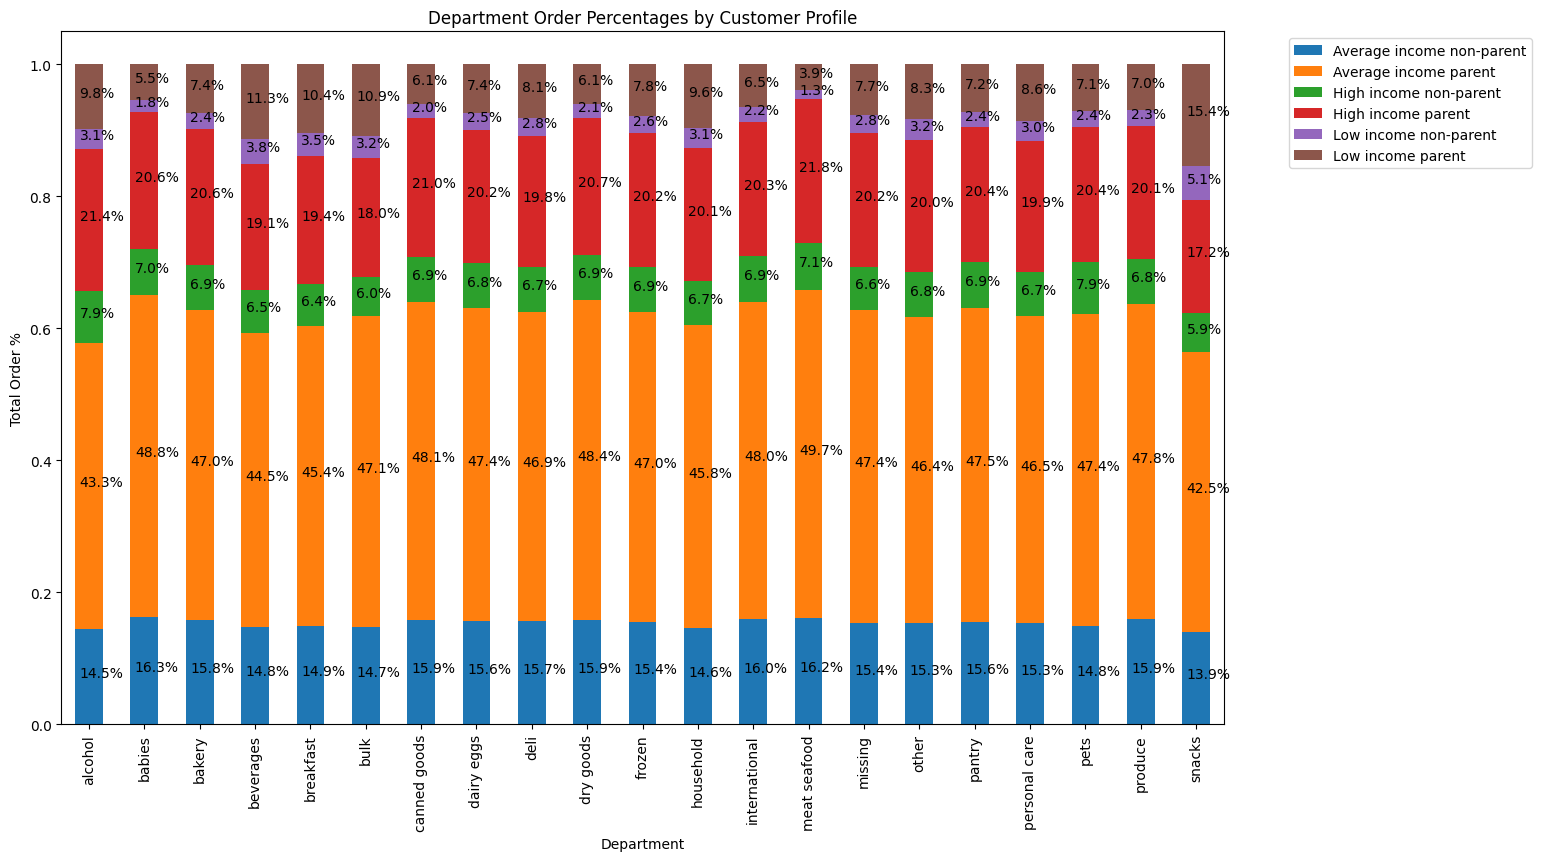

In [119]:
chart1 = dep_order_perc.plot(kind='bar',
                             stacked = True,
                          figsize=(15, 9))


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Department")
plt.ylabel("Total Order %")

for n, x in enumerate([*dep_order_perc_label.index.values]):
    for (proportion, y_loc) in zip(dep_order_perc.loc[x],
                                   dep_order_perc.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=10)
plt.title('Department Order Percentages by Customer Profile')
plt.show()

In [120]:
# Compare customer profiles with order times

profileoutput = pd.crosstab(order_products_all['order_time_of_day'], order_products_all['customer_profile'], dropna = False)

In [121]:
# Check profile crosstab

profileoutput

customer_profile,Average income non-parent,Average income parent,High income non-parent,High income parent,Low income non-parent,Low income parent
order_time_of_day,,,,,,
0,34512,103876,14320,43236,5340,17485
1,17747,56242,7302,22218,3293,8898
2,10221,32507,5364,13294,1984,6005
3,7920,23869,3826,9815,1269,4582
4,8052,24818,3358,11274,1329,4411
5,13851,41758,6104,17226,2097,6925
6,45826,138615,20337,57249,7328,21138
7,142883,420516,60555,177735,23533,65832
8,267211,804690,114301,341703,49987,140226


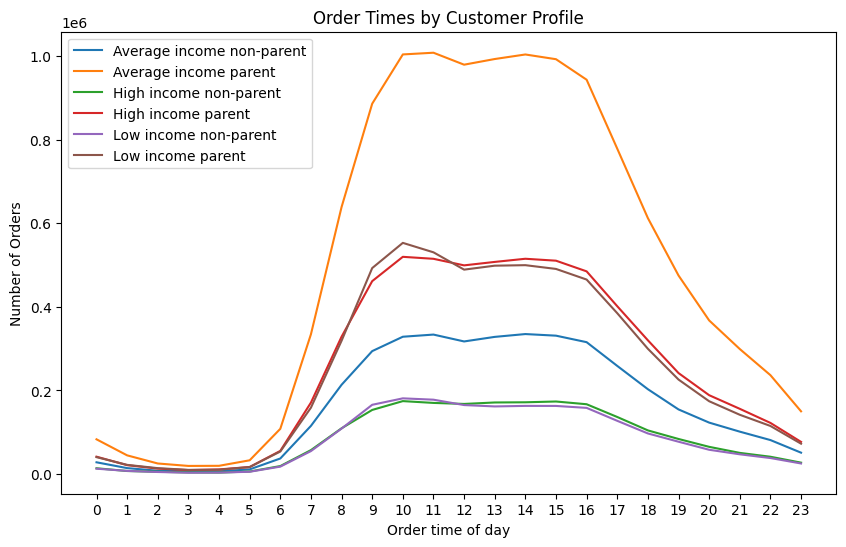

In [122]:
# plot line chart for customer profiles and order times

x = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
y = [27917,14008,7682,6422,6178,10964,37043,115129,213516,294138,328568,333730,317281,328209,334966,331129,315546,258696,202911,154502,122947,101307,81154,50971]
y2 = [82957,44530,25078,19237,19512,32722,108074,334470,639072,886549,1004509,1008602,979950,993502,1004397,993083,943953,778822,612583,475209,367630,299137,236567,149959]
y3 = [13661,7047,5198,3631,3294,5829,18875,57088,109346,153290,174425,170093,167657,171156,171615,173485,166931,136394,104283,83757,64942,50457,41217,27077]
y4 = [41375,21069,12810,9253,10858,16614,55217,170860,328615,461666,519902,515173,499462,507697,515267,510651,485085,401586,320015,241597,188574,155966,122233,76749]
y5 = [12594,7287,4689,2962,3267,5259,17573,54754,108637,165602,181040,177839,164958,161698,162973,162884,158213,127238,96987,77198,57925,47053,38120,25091]
y6 = [40265,21759,13918,9776,10133,16573,53711,158753,318932,492958,553316,530703,489224,498692,499918,490912,465474,384918,299723,226042,174138,141717,114934,72469]

fig= plt.figure(figsize=(10,6))
plt.xlabel("Order time of day")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.legend(['Average income non-parent', 'Average income parent','High income non-parent','High income parent','Low income non-parent','Low income parent'])
plt.title('Order Times by Customer Profile')
plt.show()

In [123]:
# Create crosstab for weekly orders by age group

profileoutput2 = pd.crosstab(order_products_all['day_of_week'], order_products_all['customer_profile'], dropna = False)

In [124]:
# Check output

profileoutput2

customer_profile,Average income non-parent,Average income parent,High income non-parent,High income parent,Low income non-parent,Low income parent
day_of_week,,,,,,
Friday,700263,2155701,307191,921856,104141,307338
Monday,640452,1955135,278890,827852,129787,381714
Saturday,989952,2969906,423898,1267326,136459,416641
Sunday,871819,2605387,377185,1100017,175763,530059
Thursday,643193,1952327,283859,822209,130093,374110
Tuesday,586143,1775579,258539,759511,114671,346091
Wednesday,577642,1756320,254523,748101,113040,334176


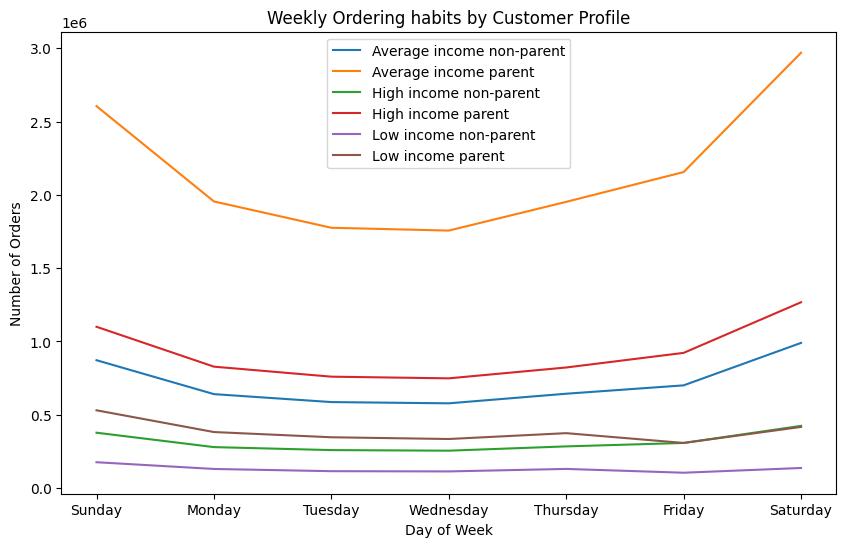

In [125]:
# Create line chart for weekly orders by customer profile

x = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
y = [871819, 640452, 586143, 577642, 643193, 700263, 989952]
y2 = [2605387, 1955135, 1775579, 1756320, 1952327, 2155701, 2969906]
y3 = [377185, 278890, 258539, 254523, 283859, 307191, 423898]
y4 = [1100017, 827852, 759511, 748101, 822209, 921856, 1267326]
y5 = [175763, 129787, 114671, 113040, 130093, 104141, 136459]
y6 = [530059, 381714, 346091, 334176, 374110, 307338, 416641]
fig= plt.figure(figsize=(10,6))
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x,y5)
plt.plot(x,y6)
plt.title('Weekly Ordering habits by Customer Profile')
plt.legend(['Average income non-parent', 'Average income parent','High income non-parent','High income parent','Low income non-parent','Low income parent'])
plt.show()

In [126]:
# count total number of customers for each profile

order_products_all.groupby('customer_profile').agg({'user_id' :['count']})

,user_id
,count
customer_profile,
Average income non-parent,5009464
Average income parent,15170355
High income non-parent,2184085
High income parent,6446872
Low income non-parent,903954
Low income parent,2690129


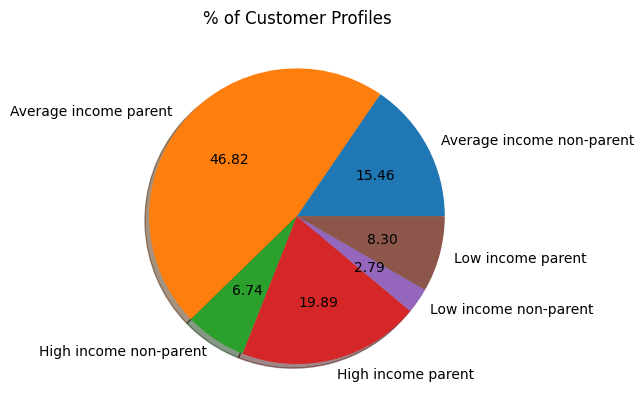

In [127]:
# create pie chart to show distribution of customer profiles
y = np.array([5009464, 15170355, 2184085, 6446872, 903954, 2690129])
mylabels = ["Average income non-parent", "Average income parent", "High income non-parent", "High income parent", "Low income non-parent","Low income parent"]

plt.pie(y, labels = mylabels, autopct='%.2f', shadow = True,)
plt.title('% of Customer Profiles')
plt.show()

In [128]:
# Work out total revenue for each customer profile

order_products_all.groupby('customer_profile').agg({'prices' :['sum']})

,prices
,sum
customer_profile,
Average income non-parent,39659820.8
Average income parent,120053650.6
High income non-parent,17350000.4
High income parent,51293127.1
Low income non-parent,6059954.9
Low income parent,18009566.8


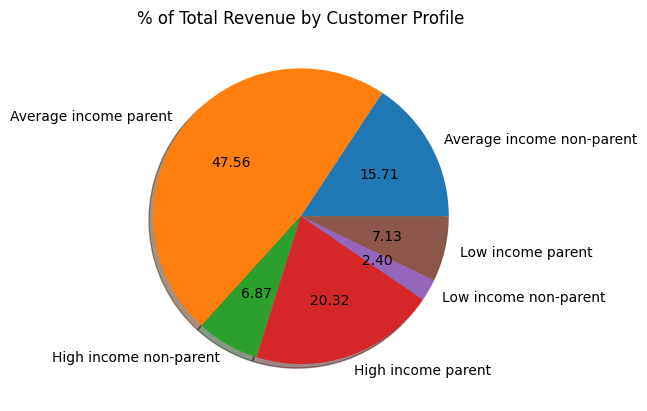

In [129]:
# create pie chart to show distribution of customer profiles
y = np.array([39659820.8, 120053650.6,17350000.4, 51293127.1, 6059954.9, 18009566.8])
mylabels = ["Average income non-parent", "Average income parent", "High income non-parent", "High income parent", "Low income non-parent","Low income parent"]

plt.pie(y, labels = mylabels, autopct='%.2f', shadow = True,)
plt.title('% of Total Revenue by Customer Profile')
plt.show()

In [130]:
# Work out average order values for each customer profile

order_products_all.groupby('customer_profile').agg({'average_order' :['mean']})

,average_order
,mean
customer_profile,
Average income non-parent,8.978996
Average income parent,8.892959
High income non-parent,21.600090
High income parent,21.263241
Low income non-parent,6.703848
Low income parent,6.694697


In [131]:
# Work out average order frequencies for each customer profile

order_products_all.groupby('customer_profile').agg({'days_since_prior_order' :['mean']})

,days_since_prior_order
,mean
customer_profile,
Average income non-parent,11.079065
Average income parent,11.044624
High income non-parent,10.908433
High income parent,11.063297
Low income non-parent,11.511669
Low income parent,11.612627


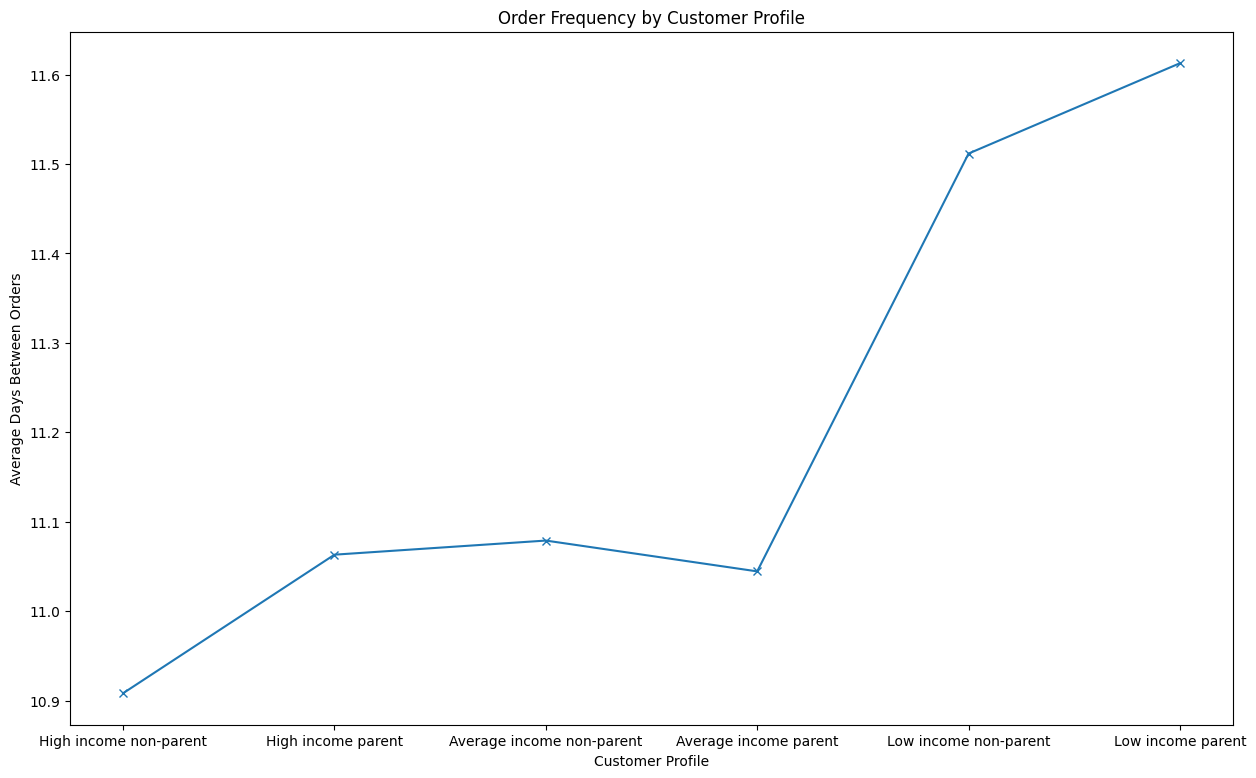

In [132]:
# Create line chart showing ordering habits by customer profile (order frequency)

x = ['High income non-parent','High income parent','Average income non-parent','Average income parent','Low income non-parent','Low income parent']
y = [10.908433, 11.063297, 11.079065, 11.044624, 11.511669, 11.612627]

fig= plt.figure(figsize=(15,9))
plt.xlabel("Customer Profile")
plt.ylabel("Average Days Between Orders")
plt.plot(x,y, marker='x')

plt.title('Order Frequency by Customer Profile')
plt.show()

customer_profile
Average income non-parent	8.978996

Average income parent	8.892959

High income non-parent	21.600090

High income parent	21.263241

Low income non-parent	6.703848

Low income parent	6.694697

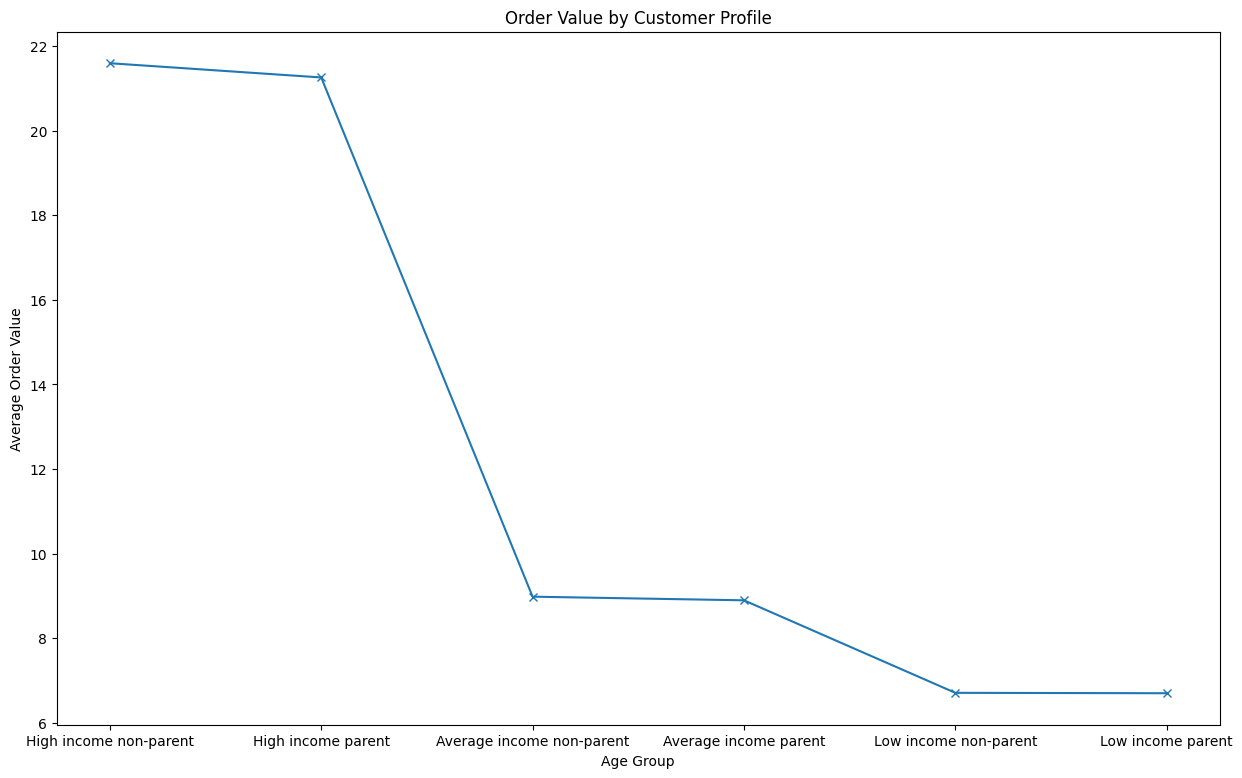

In [133]:
# Create line chart showing ordering habits of Customer Profile (order value)

x = ['High income non-parent','High income parent','Average income non-parent','Average income parent','Low income non-parent','Low income parent']
y = [21.600090,21.263241,8.978996,8.892959,6.703848,6.694697]

fig= plt.figure(figsize=(15,9))
plt.xlabel("Age Group")
plt.ylabel("Average Order Value")
plt.plot(x,y, marker='x')

plt.title('Order Value by Customer Profile')
plt.show()

In [134]:
# Work out total customers in each income group

order_products_all.groupby('income_group').agg({'user_id' :['count']})

,user_id
,count
income_group,
Average income,20179819
High income,8630957
Low income,3594083


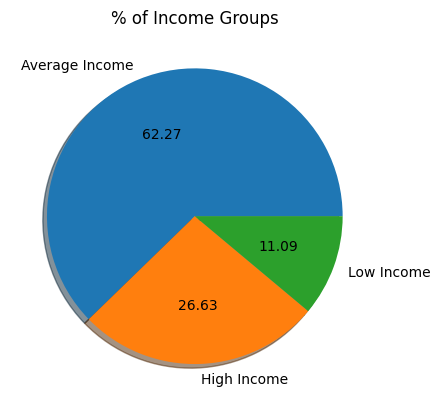

In [135]:
# create pie chart to show distribution of income groups
y = np.array([20179819, 8630957, 3594083])
mylabels = ['Average Income','High Income','Low Income']

plt.pie(y, labels = mylabels, autopct='%.2f', shadow = True,)
plt.title('% of Income Groups')
plt.show()

In [136]:
# show total revenue for each income group

order_products_all.groupby('income_group').agg({'prices' :['sum']})

,prices
,sum
income_group,
Average income,159713471.4
High income,68643127.5
Low income,24069521.7


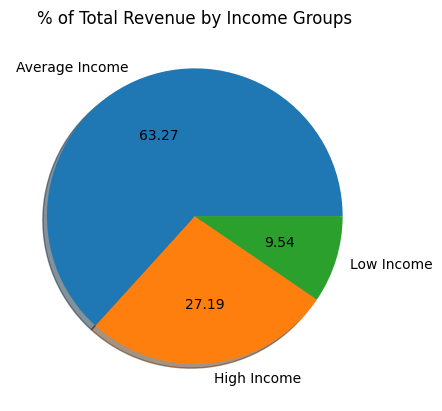

In [137]:
# create pie chart to show distribution of income groups
y = np.array([159713471.4, 68643127.5, 24069521.7])
mylabels = ['Average Income','High Income','Low Income']

plt.pie(y, labels = mylabels, autopct='%.2f', shadow = True,)
plt.title('% of Total Revenue by Income Groups')
plt.show()

In [138]:
# Work out total number of customers with different numbers of dependants

order_products_all.groupby('number_of_dependants').agg({'user_id' :['count']})

,user_id
,count
number_of_dependants,
0,8097503
1,8081104
2,8091143
3,8135109


In [139]:
# Check if difference between total revenue generated by how many dependants in family

order_products_all.groupby('number_of_dependants').agg({'prices' :['sum']})

,prices
,sum
number_of_dependants,
0,63069776.1
1,62990160.2
2,62974135.9
3,63392048.4


In [140]:
# Work out average price order for each department

order_products_all.groupby('department').agg({'prices' :['mean']})

,prices
,mean
department,
alcohol,8.143701
babies,7.638380
bakery,7.853809
beverages,7.680502
breakfast,8.028963
bulk,8.348960
canned goods,7.539976
dairy eggs,8.335056


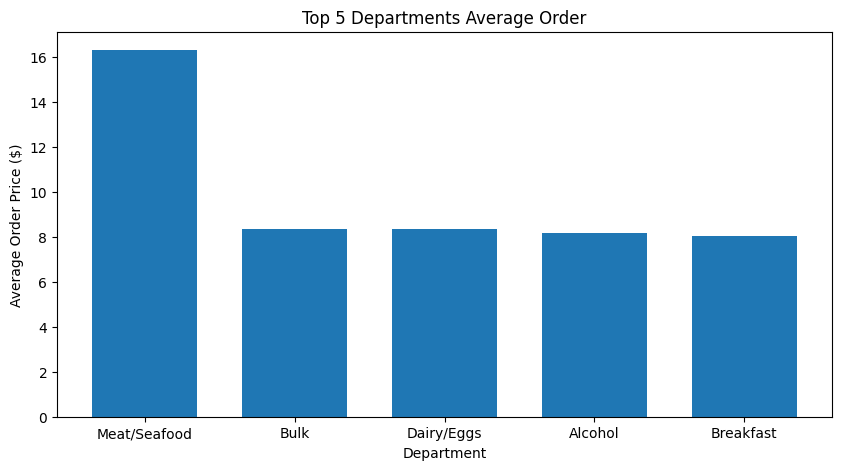

In [141]:
# Plot bar graph showing top 5 departments for average order size

data = {'Meat/Seafood':16.294443, 'Bulk':8.348960, 'Dairy/Eggs':8.335056, 'Alcohol':8.143701, 'Breakfast':8.028963}
dep = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(dep, values,
        width = 0.7)

plt.xlabel("Department")
plt.ylabel("Average Order Price ($)")
plt.title("Top 5 Departments Average Order")
plt.show()

In [ ]:
order_products_all.to_pickle(os.path.join(r'/content/drive/MyDrive/AB Instacart Project Folder/2. Data/order_products_all.pkl'))